<h1 align="center"> <strong>🎯 K-Nearest Neighbors (KNN) - Complete Implementation Guide</strong> </h1>

## 📋 Table of Contents
1. [Import Libraries and Setup](#libraries)
2. [Theory & Mathematics](#theory)
3. [Generate Sample Data](#data)
4. [Distance Metrics](#distance-metrics)
5. [Implementation from Scratch](#implementation)
6. [Scikit-learn Implementation](#sklearn)
7. [Classification Examples](#classification)
8. [Regression Examples](#regression)
9. [Comprehensive Visualizations](#visualizations)
10. [Hyperparameter Tuning](#tuning)
11. [Model Evaluation](#evaluation)
12. [Real-World Applications](#applications)
13. [Advantages & Limitations](#pros-cons)
14. [Best Practices & Summary](#best-practices)

---

## **📚 1. Import Libraries and Setup** <a id="libraries"></a>

In [34]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.datasets import make_classification, make_regression, load_iris, load_wine, load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    mean_squared_error, r2_score, mean_absolute_error,
    precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, precision_recall_curve
)

from sklearn.preprocessing import StandardScaler

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)


print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## **🧠 2. Theory & Mathematics <a id="theory"></a>**

### Core Concept
K-Nearest Neighbors is a **lazy learning algorithm** that makes predictions based on the k closest training examples in the feature space.

### Mathematical Foundation

**For Classification:**
$$\hat{y} = \text{mode}\{y_1, y_2, ..., y_k\}$$

**For Regression:**
$$\hat{y} = \frac{1}{k} \sum_{i=1}^{k} y_i$$

**Weighted Version:**
$$\hat{y} = \frac{\sum_{i=1}^{k} w_i \cdot y_i}{\sum_{i=1}^{k} w_i}$$

where $w_i = \frac{1}{d_i}$ or $w_i = \frac{1}{d_i^2}$

### Key Characteristics
- **Instance-based learning**: No explicit training phase
- **Non-parametric**: Makes no assumptions about data distribution
- **Lazy learning**: Computation happens at prediction time
- **Memory-based**: Stores all training data

## **📊 3. Generate Sample Data** <a id="data"></a>

🎯 Creating Classification Dataset
Classification dataset shape: (1000, 3)
Classes: [0 1]
Class distribution: [498 502]

📈 Creating Regression Dataset
Regression dataset shape: (800, 4)

🍷 Loading Real Datasets
Iris dataset shape: (150, 4)
Wine dataset shape: (178, 13)


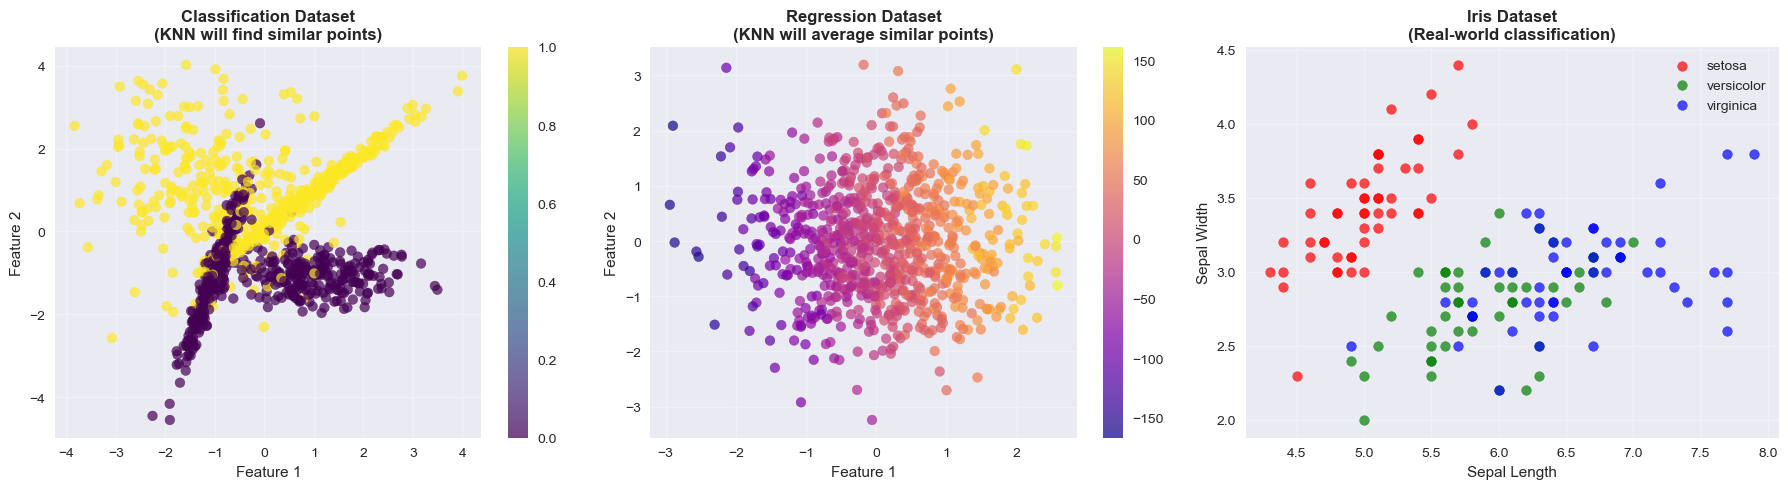


📊 Data Summary:
✅ Created synthetic classification data with 2 classes
✅ Created synthetic regression data with continuous targets
✅ Loaded real-world datasets for validation
✅ All datasets ready for KNN analysis


In [2]:
# Set random seed for reproducibility
np.random.seed(42)

print("🎯 Creating Classification Dataset")
# Classification Dataset with clear patterns
X_cls, y_cls = make_classification( n_samples=1000,  n_features=2,  n_redundant=0,  n_informative=2,  n_clusters_per_class=2,  random_state=42)

# Add feature names
feature_names_cls = ['feature_1', 'feature_2']
df_cls = pd.DataFrame(X_cls, columns=feature_names_cls)
df_cls['target'] = y_cls

print(f"Classification dataset shape: {df_cls.shape}")
print(f"Classes: {np.unique(y_cls)}")
print(f"Class distribution: {np.bincount(y_cls)}")

print("\n📈 Creating Regression Dataset")
# Regression Dataset
X_reg, y_reg = make_regression(n_samples=800, n_features=3, noise=10, random_state=42)

# Add feature names
feature_names_reg = ['feature_1', 'feature_2', 'feature_3']
df_reg = pd.DataFrame(X_reg, columns=feature_names_reg)
df_reg['target'] = y_reg

print(f"Regression dataset shape: {df_reg.shape}")

print("\n🍷 Loading Real Datasets")
# Load Iris dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Load Wine dataset
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

print(f"Iris dataset shape: {X_iris.shape}")
print(f"Wine dataset shape: {X_wine.shape}")

# Visualization
plt.figure(figsize=(18, 5))

# Classification data
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_cls[:, 0], X_cls[:, 1], c=y_cls, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('Classification Dataset\n(KNN will find similar points)', fontsize=12, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

# Regression data (first 2 features)
plt.subplot(1, 3, 2)
scatter = plt.scatter(X_reg[:, 0], X_reg[:, 1], c=y_reg, cmap='plasma', alpha=0.7)
plt.colorbar(scatter)
plt.title('Regression Dataset\n(KNN will average similar points)', fontsize=12, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)

# Iris data (first 2 features)
plt.subplot(1, 3, 3)
colors = ['red', 'green', 'blue']
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_iris[y_iris == i, 0], X_iris[y_iris == i, 1], c=colors[i], label=target_name, alpha=0.7)
plt.title('Iris Dataset\n(Real-world classification)', fontsize=12, fontweight='bold')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Data Summary:")
print(f"✅ Created synthetic classification data with {len(np.unique(y_cls))} classes")
print(f"✅ Created synthetic regression data with continuous targets")
print(f"✅ Loaded real-world datasets for validation")
print(f"✅ All datasets ready for KNN analysis")

## **📏 4. Distance Metrics <a id="distance-metrics"></a>**

### 1. Euclidean Distance (Most Common)
$$d_{euclidean}(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

### 2. Manhattan Distance (L1 Norm)
$$d_{manhattan}(x, y) = \sum_{i=1}^{n} |x_i - y_i|$$

### 3. Minkowski Distance (Generalized)
$$d_{minkowski}(x, y) = \left(\sum_{i=1}^{n} |x_i - y_i|^p\right)^{1/p}$$

### 4. Chebyshev Distance (L∞ Norm)
$$d_{chebyshev}(x, y) = \max_i |x_i - y_i|$$

### 5. Hamming Distance (For Categorical Data)
$$d_{hamming}(x, y) = \frac{1}{n} \sum_{i=1}^{n} I(x_i \neq y_i)$$

🔍 Distance Metrics Comparison
Point A: [1 2]
Point B: [4 6]

📏 Distance Calculations:
Euclidean Distance (L2): 5.000
Manhattan Distance (L1): 7.000
Minkowski Distance (p=3): 4.498
Chebyshev Distance (L∞): 4.000


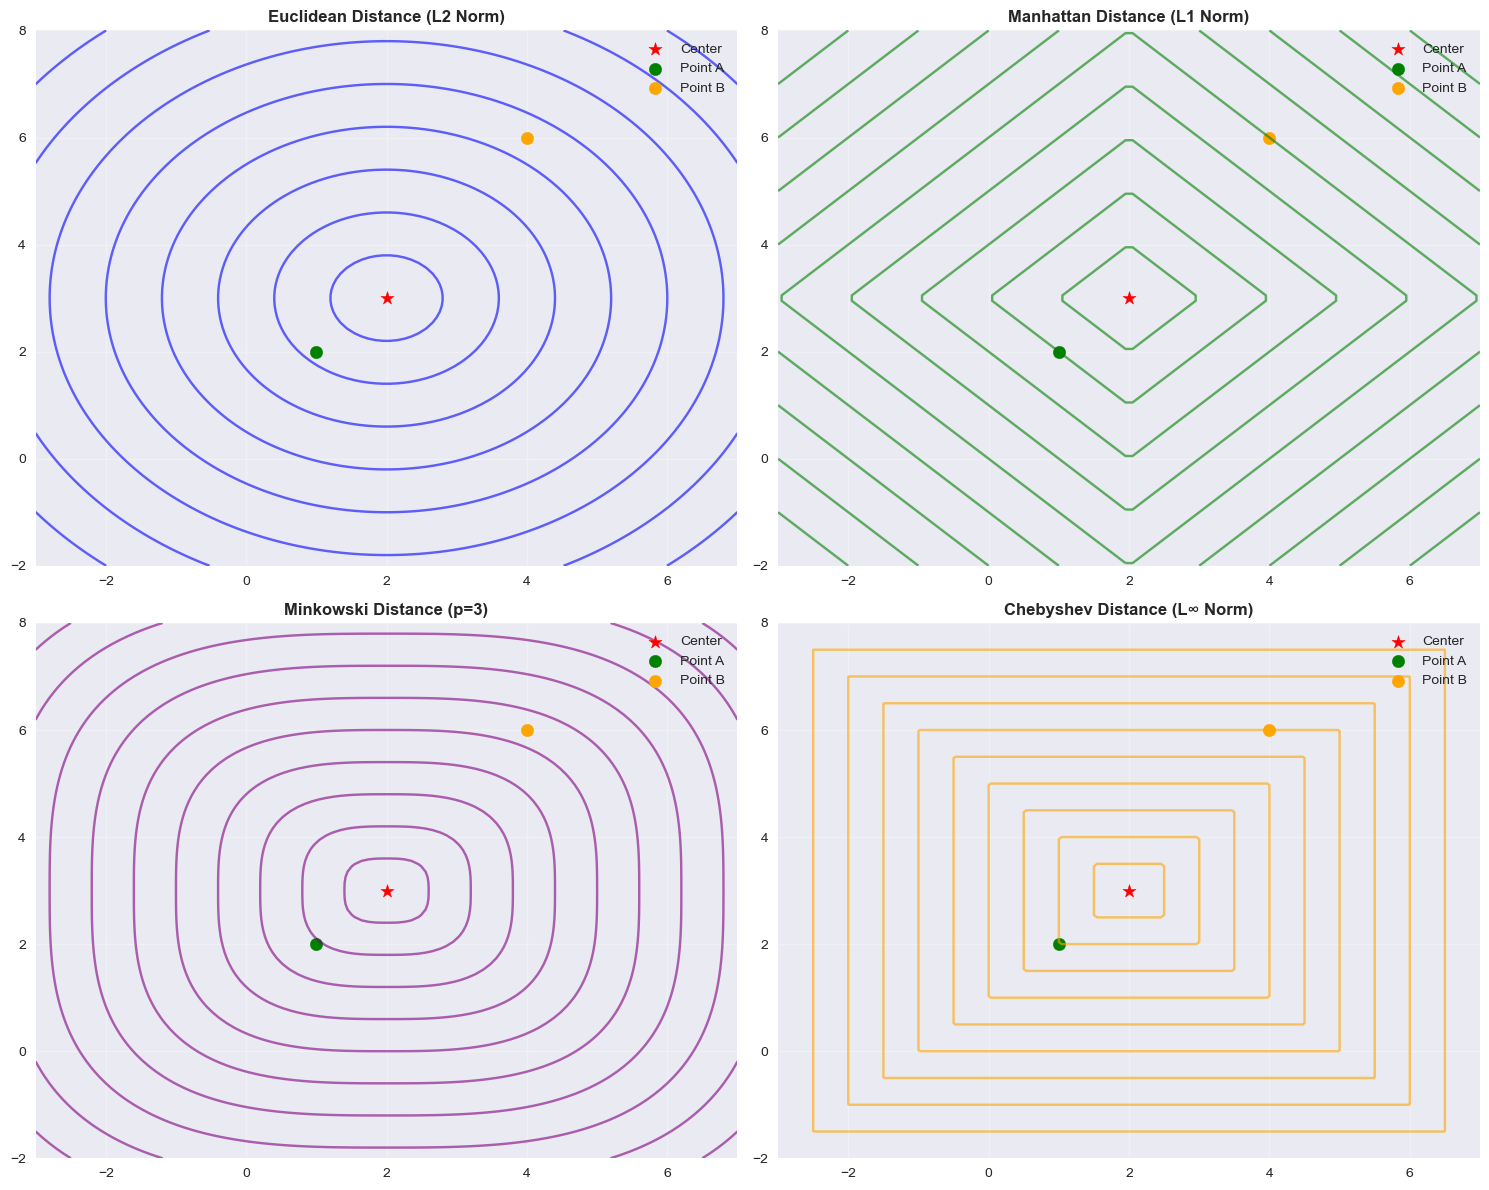


🎯 Distance Metric Characteristics:
• Euclidean: Most common, good for continuous data
• Manhattan: Robust to outliers, good for high dimensions
• Minkowski: Generalizes Euclidean and Manhattan
• Chebyshev: Considers only the maximum difference


In [3]:
# Demonstrate different distance metrics with sample points
print("🔍 Distance Metrics Comparison")

# Create two sample points
point_a = np.array([1, 2])
point_b = np.array([4, 6])

print(f"Point A: {point_a}")
print(f"Point B: {point_b}")
print()

# Calculate different distances
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p):
    return np.sum(np.abs(a - b) ** p) ** (1/p)

def chebyshev_distance(a, b):
    return np.max(np.abs(a - b))

# Calculate distances
euclidean = euclidean_distance(point_a, point_b)
manhattan = manhattan_distance(point_a, point_b)
minkowski_3 = minkowski_distance(point_a, point_b, 3)
chebyshev = chebyshev_distance(point_a, point_b)

print("📏 Distance Calculations:")
print(f"Euclidean Distance (L2): {euclidean:.3f}")
print(f"Manhattan Distance (L1): {manhattan:.3f}")
print(f"Minkowski Distance (p=3): {minkowski_3:.3f}")
print(f"Chebyshev Distance (L∞): {chebyshev:.3f}")

# Visualize different distance metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Sample data for visualization
x = np.linspace(-3, 7, 100)
y = np.linspace(-2, 8, 100)
X_grid, Y_grid = np.meshgrid(x, y)

center = np.array([2, 3])

# Euclidean distance
euclidean_dist = np.sqrt((X_grid - center[0])**2 + (Y_grid - center[1])**2)
contour1 = axes[0, 0].contour(X_grid, Y_grid, euclidean_dist, levels=10, colors='blue', alpha=0.6)
axes[0, 0].scatter(*center, color='red', s=100, marker='*', label='Center')
axes[0, 0].scatter(*point_a, color='green', s=80, label='Point A')
axes[0, 0].scatter(*point_b, color='orange', s=80, label='Point B')
axes[0, 0].set_title('Euclidean Distance (L2 Norm)', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Manhattan distance
manhattan_dist = np.abs(X_grid - center[0]) + np.abs(Y_grid - center[1])
contour2 = axes[0, 1].contour(X_grid, Y_grid, manhattan_dist, levels=10, colors='green', alpha=0.6)
axes[0, 1].scatter(*center, color='red', s=100, marker='*', label='Center')
axes[0, 1].scatter(*point_a, color='green', s=80, label='Point A')
axes[0, 1].scatter(*point_b, color='orange', s=80, label='Point B')
axes[0, 1].set_title('Manhattan Distance (L1 Norm)', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Minkowski distance (p=3)
minkowski_dist = (np.abs(X_grid - center[0])**3 + np.abs(Y_grid - center[1])**3)**(1/3)
contour3 = axes[1, 0].contour(X_grid, Y_grid, minkowski_dist, levels=10, colors='purple', alpha=0.6)
axes[1, 0].scatter(*center, color='red', s=100, marker='*', label='Center')
axes[1, 0].scatter(*point_a, color='green', s=80, label='Point A')
axes[1, 0].scatter(*point_b, color='orange', s=80, label='Point B')
axes[1, 0].set_title('Minkowski Distance (p=3)', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Chebyshev distance
chebyshev_dist = np.maximum(np.abs(X_grid - center[0]), np.abs(Y_grid - center[1]))
contour4 = axes[1, 1].contour(X_grid, Y_grid, chebyshev_dist, levels=10, colors='orange', alpha=0.6)
axes[1, 1].scatter(*center, color='red', s=100, marker='*', label='Center')
axes[1, 1].scatter(*point_a, color='green', s=80, label='Point A')
axes[1, 1].scatter(*point_b, color='orange', s=80, label='Point B')
axes[1, 1].set_title('Chebyshev Distance (L∞ Norm)', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 Distance Metric Characteristics:")
print("• Euclidean: Most common, good for continuous data")
print("• Manhattan: Robust to outliers, good for high dimensions")
print("• Minkowski: Generalizes Euclidean and Manhattan")
print("• Chebyshev: Considers only the maximum difference")

## **🔧 5. Implementation from Scratch <a id="implementation"></a>**

In [4]:
class KNNFromScratch:
    def __init__(self, k=3, distance_metric='euclidean', weights='uniform'):
        """
        K-Nearest Neighbors implementation from scratch
        
        Parameters:
        -----------
        k : int, default=3
            Number of neighbors to consider
        distance_metric : str, default='euclidean'
            Distance metric to use ('euclidean', 'manhattan', 'chebyshev')
        weights : str, default='uniform'
            Weight function ('uniform', 'distance')
        """
        self.k = k
        self.distance_metric = distance_metric
        self.weights = weights
    
    def _calculate_distance(self, x1, x2):
        """Calculate distance between two points"""
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.distance_metric == 'chebyshev':
            return np.max(np.abs(x1 - x2))
        else:
            raise ValueError(f"Unknown distance metric: {self.distance_metric}")
    
    def fit(self, X, y):
        """Store training data"""
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self
    
    def _get_neighbors(self, x):
        """Get k nearest neighbors for a single point"""
        distances = []
        
        # Calculate distances to all training points
        for i, x_train in enumerate(self.X_train):
            dist = self._calculate_distance(x, x_train)
            distances.append((dist, i))
        
        # Sort by distance and get k nearest
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:self.k]
        
        return neighbors
    
    def predict(self, X):
        """Make predictions for input data"""
        X = np.array(X)
        predictions = []
        
        for x in X:
            neighbors = self._get_neighbors(x)
            
            if self.weights == 'uniform':
                # Simple majority vote or average
                neighbor_labels = [self.y_train[i] for _, i in neighbors]
                
                # Check if classification or regression
                if isinstance(self.y_train[0], (int, np.integer)) and len(np.unique(self.y_train)) < len(self.y_train) / 2:
                    # Classification: majority vote
                    prediction = Counter(neighbor_labels).most_common(1)[0][0]
                else:
                    # Regression: average
                    prediction = np.mean(neighbor_labels)
                    
            else:  # distance weighting
                weights = []
                neighbor_labels = []
                
                for dist, i in neighbors:
                    weight = 1 / (dist + 1e-8)  # Add small epsilon to avoid division by zero
                    weights.append(weight)
                    neighbor_labels.append(self.y_train[i])
                
                weights = np.array(weights)
                neighbor_labels = np.array(neighbor_labels)
                
                # Check if classification or regression
                if isinstance(self.y_train[0], (int, np.integer)) and len(np.unique(self.y_train)) < len(self.y_train) / 2:
                    # Classification: weighted vote
                    unique_labels = np.unique(neighbor_labels)
                    label_weights = {}
                    
                    for label in unique_labels:
                        mask = neighbor_labels == label
                        label_weights[label] = np.sum(weights[mask])
                    
                    prediction = max(label_weights, key=label_weights.get)
                else:
                    # Regression: weighted average
                    prediction = np.sum(weights * neighbor_labels) / np.sum(weights)
            
            predictions.append(prediction)
        
        return np.array(predictions)

print("✅ KNN from scratch implemented!")

✅ KNN from scratch implemented!


## **🔬 6. Scikit-learn Implementation** <a id="sklearn"></a>

### Basic KNN Usage
Scikit-learn provides optimized implementations of KNN with various distance metrics, algorithms, and optimizations.

### Key Parameters:
- **n_neighbors**: Number of neighbors (K)
- **weights**: 'uniform' or 'distance'
- **algorithm**: 'auto', 'ball_tree', 'kd_tree', 'brute'
- **metric**: Distance metric to use
- **p**: Power parameter for Minkowski metric

🔬 Comprehensive Scikit-learn KNN Implementation

📊 1. Basic Classification with Different Algorithms


,Algorithm,Accuracy,Train_Time_ms,Predict_Time_ms
0,auto,0.911,1.881,9.348
1,ball_tree,0.911,1.433,4.528
2,kd_tree,0.911,1.502,8.013
3,brute,0.911,1.037,3.586



📏 2. Distance Metrics Comparison


,Metric,Accuracy
0,euclidean,0.911
1,manhattan,0.911
2,chebyshev,0.911
3,minkowski (p=1),0.911
4,minkowski (p=2),0.911
5,minkowski (p=3),0.911



📈 3. KNN Regression Example

Regression Results (MSE and R²):

Regression Results (MSE and R²):


,K,Weights,MSE,R²
0,3,uniform,1653.154,0.866
1,5,uniform,1501.601,0.878
2,7,uniform,1483.241,0.880
3,9,uniform,1521.605,0.877
4,3,distance,1549.922,0.874
5,5,distance,1423.174,0.885
6,7,distance,1404.955,0.886
7,9,distance,1436.988,0.884


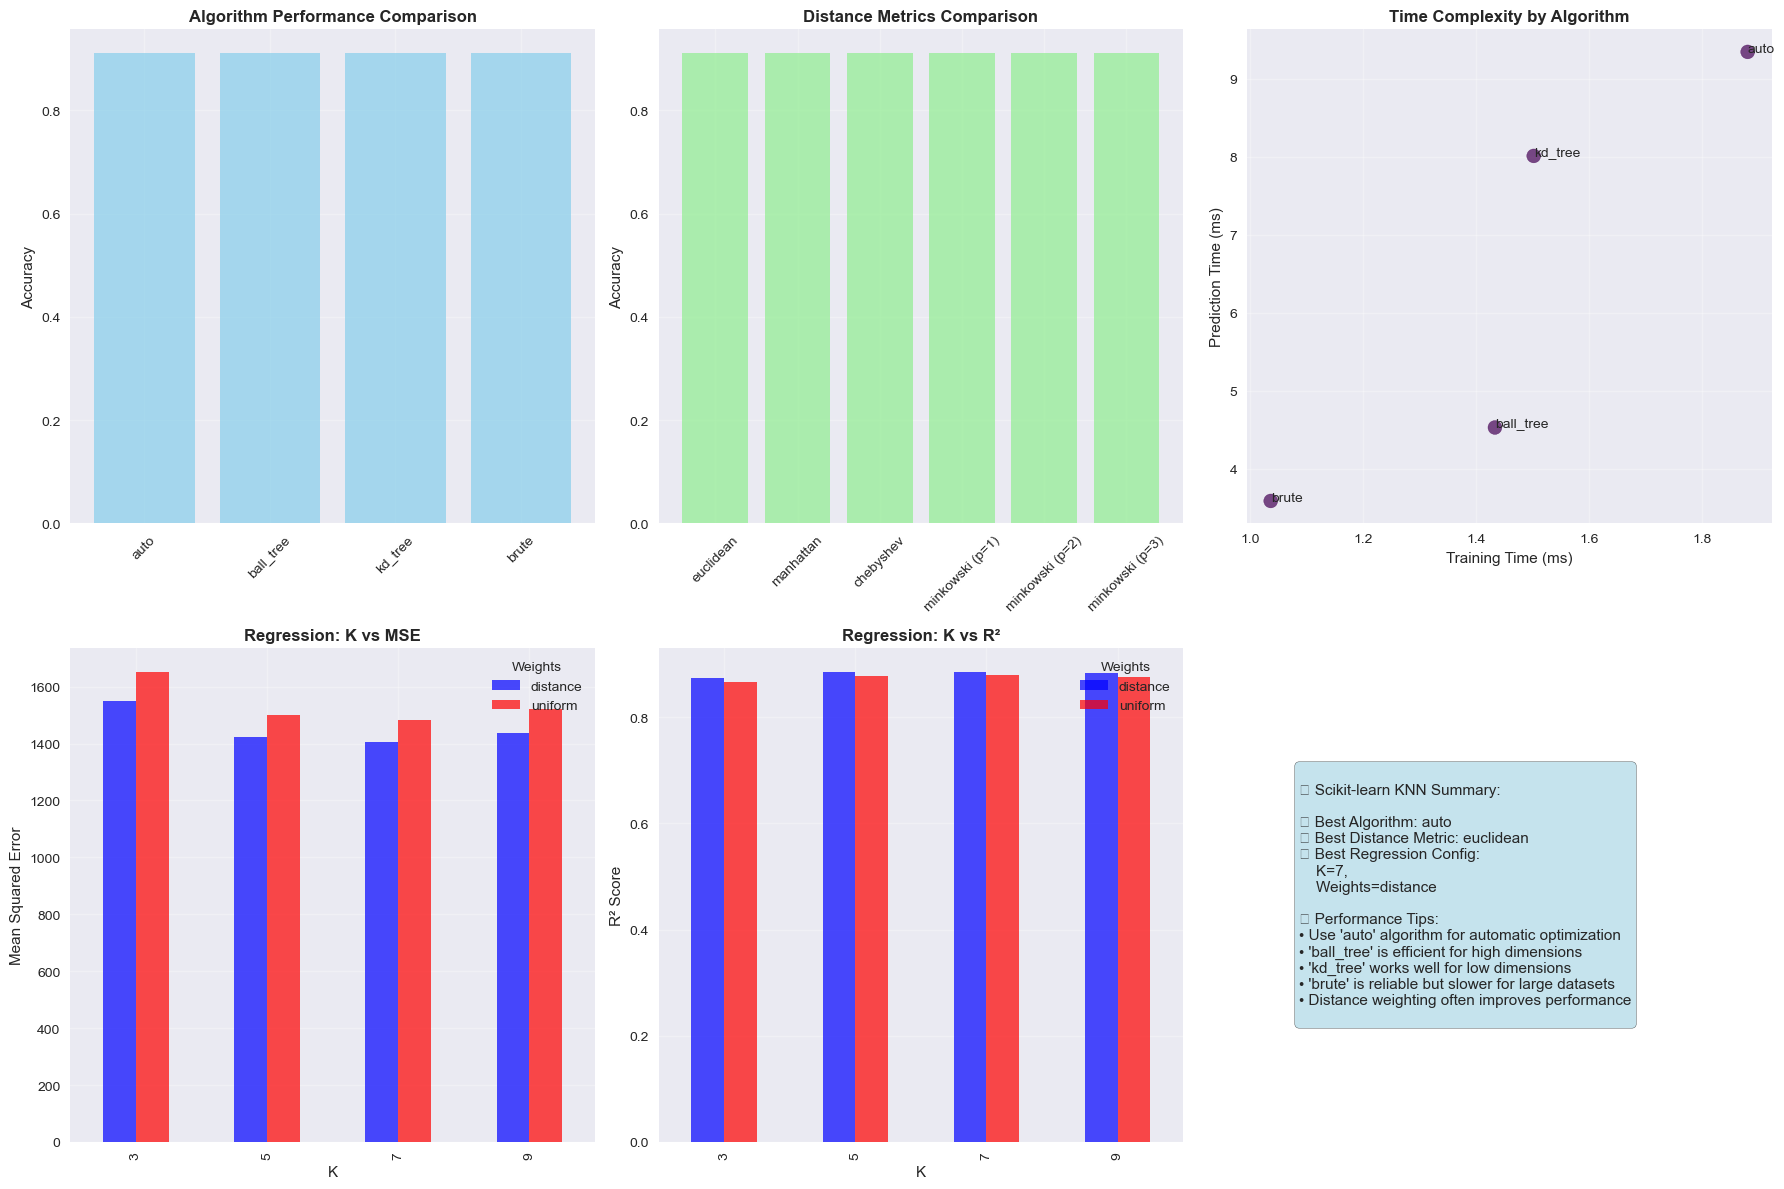


✅ Scikit-learn KNN implementation complete!
🏆 Best overall configuration:
   Classification   : auto algorithm
   Distance metric  : euclidean
   Regression       : K=7, weights=distance


In [7]:
print("🔬 Comprehensive Scikit-learn KNN Implementation")

# =============================================================================
# 1. BASIC CLASSIFICATION EXAMPLE
# =============================================================================

# Load iris dataset for demonstration
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Split the data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

# Scale features
scaler = StandardScaler()
X_train_iris_scaled = scaler.fit_transform(X_train_iris)
X_test_iris_scaled = scaler.transform(X_test_iris)

print("\n📊 1. Basic Classification with Different Algorithms")

# Compare different algorithms
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
algorithm_results = []

for algorithm in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algorithm)
    
    # Time the training and prediction
    import time
    start_time = time.time()
    knn.fit(X_train_iris_scaled, y_train_iris)
    train_time = time.time() - start_time
    
    start_time = time.time()
    predictions = knn.predict(X_test_iris_scaled)
    predict_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test_iris, predictions)
    
    algorithm_results.append({
        'Algorithm': algorithm,
        'Accuracy': accuracy,
        'Train_Time_ms': train_time * 1000,
        'Predict_Time_ms': predict_time * 1000
    })

results_df = pd.DataFrame(algorithm_results)
display(results_df.round(3))

# =============================================================================
# 2. DISTANCE METRICS COMPARISON
# =============================================================================

print("\n📏 2. Distance Metrics Comparison")

distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
metric_results = []

for metric in distance_metrics:
    if metric == 'minkowski':
        # Test different p values for Minkowski
        for p in [1, 2, 3]:
            knn = KNeighborsClassifier(n_neighbors=5, metric=metric, p=p)
            knn.fit(X_train_iris_scaled, y_train_iris)
            predictions = knn.predict(X_test_iris_scaled)
            accuracy = accuracy_score(y_test_iris, predictions)
            
            metric_results.append({
                'Metric': f'{metric} (p={p})',
                'Accuracy': accuracy
            })
    else:
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
        knn.fit(X_train_iris_scaled, y_train_iris)
        predictions = knn.predict(X_test_iris_scaled)
        accuracy = accuracy_score(y_test_iris, predictions)
        
        metric_results.append({
            'Metric': metric,
            'Accuracy': accuracy
        })

metric_df = pd.DataFrame(metric_results)
display(metric_df.round(3))

# =============================================================================
# 3. REGRESSION EXAMPLE
# =============================================================================

print("\n📈 3. KNN Regression Example")

# Create regression dataset
X_reg, y_reg = make_regression(n_samples=500, n_features=5, noise=0.1, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# Scale features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Compare uniform vs distance weighting
weights = ['uniform', 'distance']
k_values = [3, 5, 7, 9]

regression_comparison = []

for weight in weights:
    for k in k_values:
        knn_reg = KNeighborsRegressor(n_neighbors=k, weights=weight)
        knn_reg.fit(X_train_reg_scaled, y_train_reg)
        predictions = knn_reg.predict(X_test_reg_scaled)
        
        mse = mean_squared_error(y_test_reg, predictions)
        r2 = r2_score(y_test_reg, predictions)
        
        regression_comparison.append({
            'K': k,
            'Weights': weight,
            'MSE': mse,
            'R²': r2
        })

regression_df = pd.DataFrame(regression_comparison)
print("\nRegression Results (MSE and R²):")
display(regression_df.round(3))

# =============================================================================
# 4. VISUALIZATION
# =============================================================================

# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Algorithm comparison
algorithms_plot = results_df.set_index('Algorithm')['Accuracy']
axes[0, 0].bar(algorithms_plot.index, algorithms_plot.values, color='skyblue', alpha=0.7)
axes[0, 0].set_title('Algorithm Performance Comparison', fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Distance metrics comparison
metric_plot = metric_df.set_index('Metric')['Accuracy']
axes[0, 1].bar(metric_plot.index, metric_plot.values, color='lightgreen', alpha=0.7)
axes[0, 1].set_title('Distance Metrics Comparison', fontweight='bold')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Training vs Prediction time
axes[0, 2].scatter(results_df['Train_Time_ms'], results_df['Predict_Time_ms'], s=100, alpha=0.7, c=results_df['Accuracy'], cmap='viridis')
for i, txt in enumerate(results_df['Algorithm']):
    axes[0, 2].annotate(txt, (results_df['Train_Time_ms'].iloc[i], results_df['Predict_Time_ms'].iloc[i]))
axes[0, 2].set_xlabel('Training Time (ms)')
axes[0, 2].set_ylabel('Prediction Time (ms)')
axes[0, 2].set_title('Time Complexity by Algorithm', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# Regression: K vs MSE
pivot_reg = regression_df.pivot(index='K', columns='Weights', values='MSE')
pivot_reg.plot(kind='bar', ax=axes[1, 0], color=['blue', 'red'], alpha=0.7)
axes[1, 0].set_title('Regression: K vs MSE', fontweight='bold')
axes[1, 0].set_ylabel('Mean Squared Error')
axes[1, 0].legend(title='Weights')
axes[1, 0].grid(True, alpha=0.3)

# Regression: K vs R²
pivot_r2 = regression_df.pivot(index='K', columns='Weights', values='R²')
pivot_r2.plot(kind='bar', ax=axes[1, 1], color=['blue', 'red'], alpha=0.7)
axes[1, 1].set_title('Regression: K vs R²', fontweight='bold')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].legend(title='Weights')
axes[1, 1].grid(True, alpha=0.3)

# Feature scaling impact demonstration
axes[1, 2].axis('off')  # We'll add text summary here

# Add summary text
summary_text = f"""
🔬 Scikit-learn KNN Summary:

📊 Best Algorithm: {results_df.loc[results_df['Accuracy'].idxmax(), 'Algorithm']}
📏 Best Distance Metric: {metric_df.loc[metric_df['Accuracy'].idxmax(), 'Metric']}
📈 Best Regression Config: 
    K={regression_df.loc[regression_df['R²'].idxmax(), 'K']}, 
    Weights={regression_df.loc[regression_df['R²'].idxmax(), 'Weights']}

⚡ Performance Tips:
• Use 'auto' algorithm for automatic optimization
• 'ball_tree' is efficient for high dimensions
• 'kd_tree' works well for low dimensions
• 'brute' is reliable but slower for large datasets
• Distance weighting often improves performance
"""

axes[1, 2].text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center',bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()

print("\n✅ Scikit-learn KNN implementation complete!")
print(f"🏆 Best overall configuration:")
print(f"   Classification   : {results_df.loc[results_df['Accuracy'].idxmax(), 'Algorithm']} algorithm")
print(f"   Distance metric  : {metric_df.loc[metric_df['Accuracy'].idxmax(), 'Metric']}")
print(f"   Regression       : K={regression_df.loc[regression_df['R²'].idxmax(), 'K']}, weights={regression_df.loc[regression_df['R²'].idxmax(), 'Weights']}")

## **📊 7. Classification Examples** <a id="classification"></a>

In [8]:
# Load Iris dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris)

# Scale features
scaler = StandardScaler()
X_train_iris_scaled = scaler.fit_transform(X_train_iris)
X_test_iris_scaled  = scaler.transform(X_test_iris)

print(f"Dataset shape : {X_iris.shape}")
print(f"Classes       : {iris.target_names}")
print(f"Features      : {iris.feature_names}")

Dataset shape : (150, 4)
Classes       : ['setosa' 'versicolor' 'virginica']
Features      : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
# Compare different distance metrics
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
k_values = [3, 5, 7, 9]

results = []

for metric in distance_metrics:
    for k in k_values:
        # Our implementation
        knn_scratch = KNNFromScratch(k=k, distance_metric=metric)
        knn_scratch.fit(X_train_iris_scaled, y_train_iris)
        pred_scratch = knn_scratch.predict(X_test_iris_scaled)
        acc_scratch = accuracy_score(y_test_iris, pred_scratch)
        
        # Sklearn implementation
        knn_sklearn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_sklearn.fit(X_train_iris_scaled, y_train_iris)
        pred_sklearn = knn_sklearn.predict(X_test_iris_scaled)
        acc_sklearn = accuracy_score(y_test_iris, pred_sklearn)
        
        results.append({
            'Metric': metric,
            'K': k,
            'Scratch_Accuracy': acc_scratch,
            'Sklearn_Accuracy': acc_sklearn
        })

results_df = pd.DataFrame(results)
print("🎯 Classification Results Comparison:")
display(results_df.round(3))

🎯 Classification Results Comparison:


,Metric,K,Scratch_Accuracy,Sklearn_Accuracy
0,euclidean,3,0.911,0.911
1,euclidean,5,0.911,0.911
2,euclidean,7,0.933,0.933
3,euclidean,9,0.956,0.956
4,manhattan,3,0.933,0.933
5,manhattan,5,0.911,0.911
6,manhattan,7,0.911,0.911
7,manhattan,9,0.911,0.911
8,chebyshev,3,0.889,0.889
9,chebyshev,5,0.911,0.911


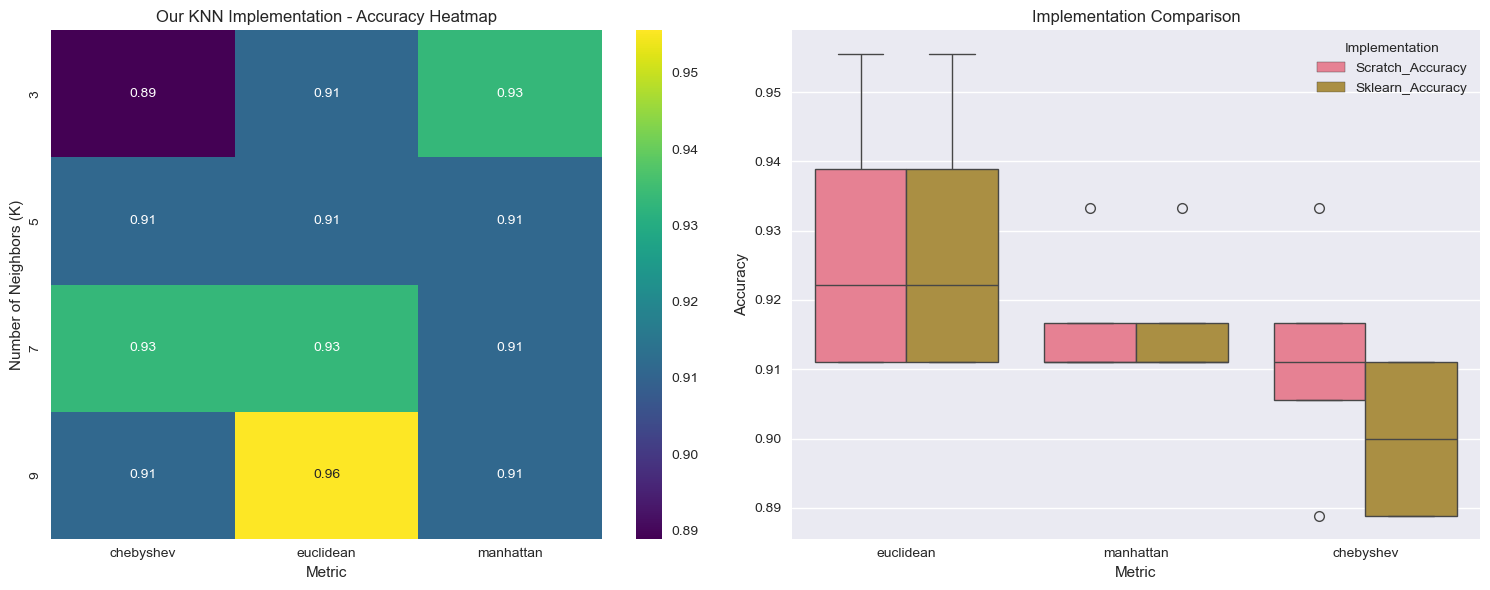

In [10]:
# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot accuracy by distance metric
pivot_scratch = results_df.pivot(index='K', columns='Metric', values='Scratch_Accuracy')
sns.heatmap(pivot_scratch, annot=True, cmap='viridis', ax=axes[0])
axes[0].set_title('Our KNN Implementation - Accuracy Heatmap')
axes[0].set_ylabel('Number of Neighbors (K)')

# Plot accuracy comparison
comparison_data = results_df.melt(id_vars=['Metric', 'K'], value_vars=['Scratch_Accuracy', 'Sklearn_Accuracy'],var_name='Implementation', value_name='Accuracy')

sns.boxplot(data=comparison_data, x='Metric', y='Accuracy', hue='Implementation', ax=axes[1])
axes[1].set_title('Implementation Comparison')
axes[1].legend(title='Implementation')

plt.tight_layout()
plt.show()

## **📈 8. Regression Examples** <a id="regression"></a>

In [11]:
# Generate regression dataset
X_reg, y_reg = make_regression(n_samples=500, n_features=5, noise=0.1, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# Scale features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print(f"Regression dataset shape: {X_reg.shape}")
print(f"Target range: [{y_reg.min():.2f}, {y_reg.max():.2f}]")

Regression dataset shape: (500, 5)
Target range: [-332.01, 365.96]


In [13]:
# Test regression with different configurations
k_values = [3, 5, 7, 9, 11]
weights = ['uniform', 'distance']

regression_results = []

for k in k_values:
    for weight in weights:
        # Sklearn KNN Regressor
        knn_reg = KNeighborsRegressor(n_neighbors=k, weights=weight)
        knn_reg.fit(X_train_reg_scaled, y_train_reg)
        pred_reg = knn_reg.predict(X_test_reg_scaled)
        
        mse = mean_squared_error(y_test_reg, pred_reg)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test_reg, pred_reg)
        r2 = r2_score(y_test_reg, pred_reg)
        
        regression_results.append({
            'K': k,
            'Weights': weight,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2
        })

reg_results_df = pd.DataFrame(regression_results)
print("📈 Regression Results:")
display(reg_results_df.round(3))

📈 Regression Results:


,K,Weights,MSE,RMSE,MAE,R²
0,3,uniform,1653.154,40.659,28.579,0.866
1,3,distance,1549.922,39.369,27.589,0.874
2,5,uniform,1501.601,38.750,27.915,0.878
3,5,distance,1423.174,37.725,26.989,0.885
4,7,uniform,1483.241,38.513,28.458,0.880
5,7,distance,1404.955,37.483,27.288,0.886
6,9,uniform,1521.605,39.008,29.476,0.877
7,9,distance,1436.988,37.908,28.117,0.884
8,11,uniform,1673.874,40.913,30.691,0.864
9,11,distance,1562.515,39.529,29.283,0.873


## **📊 9. Comprehensive Visualizations** <a id="visualizations"></a>

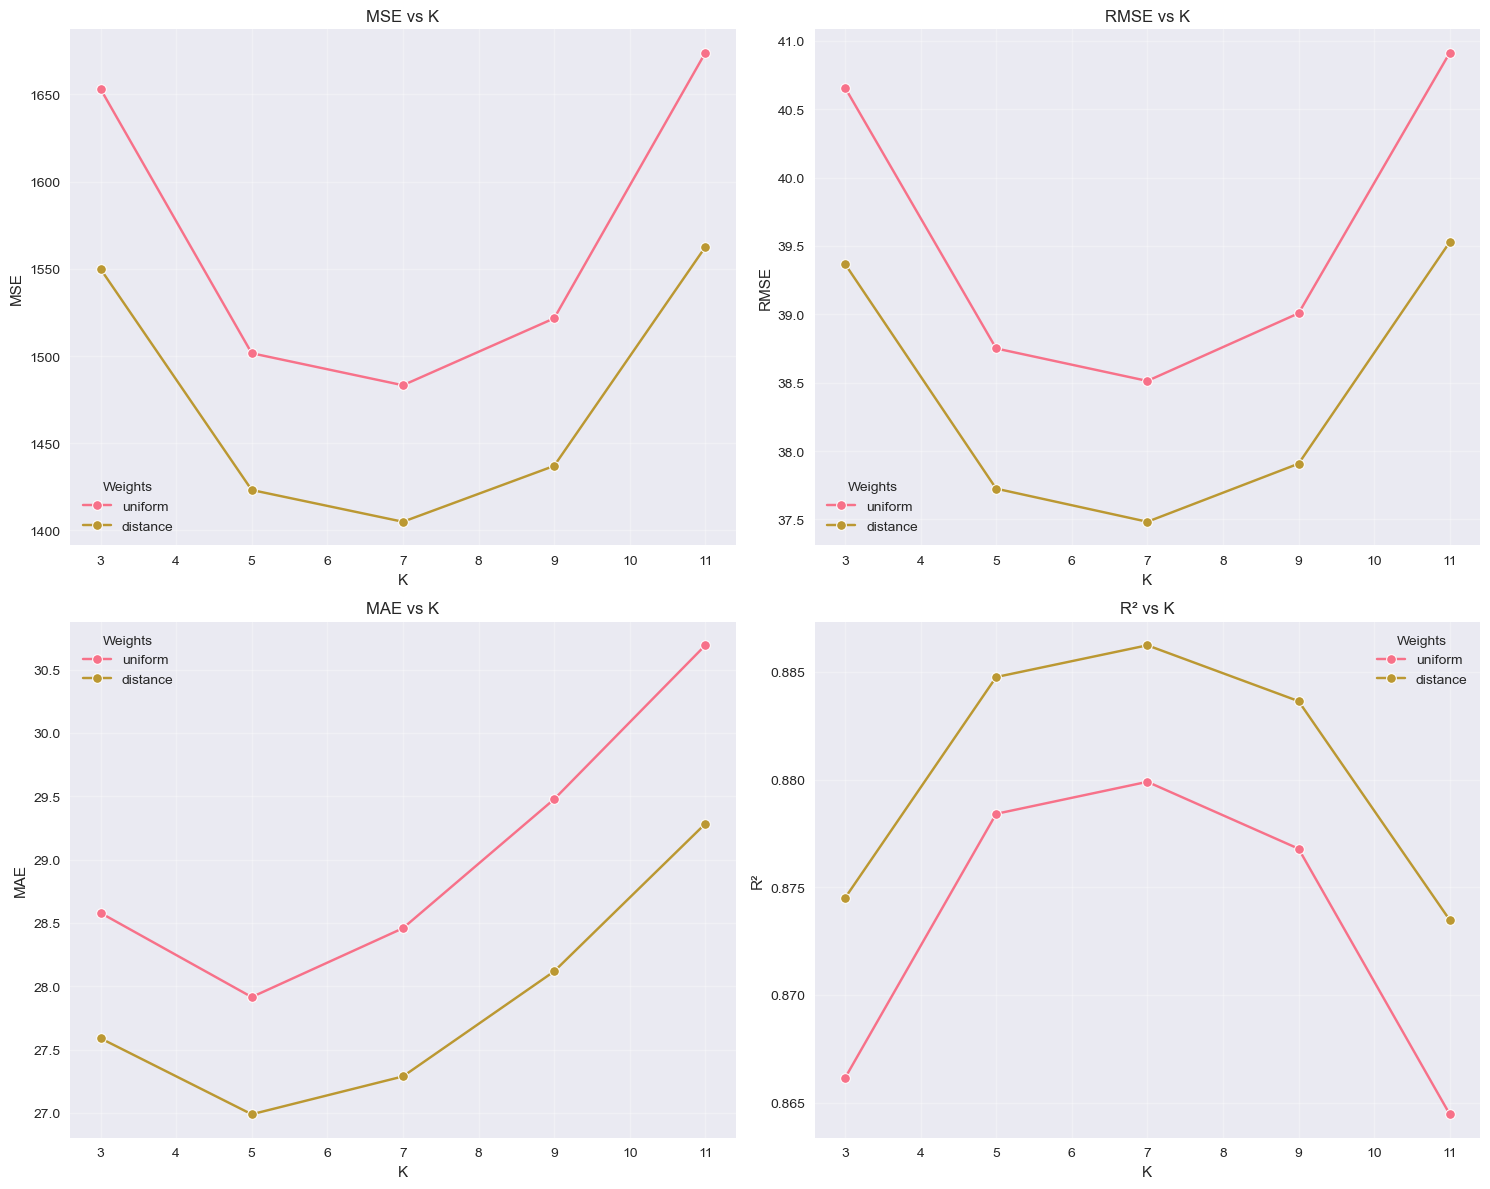

In [14]:
# Visualize regression results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics = ['MSE', 'RMSE', 'MAE', 'R²']
for i, metric in enumerate(metrics):
    row, col = i // 2, i % 2
    
    sns.lineplot(data=reg_results_df, x='K', y=metric, hue='Weights', 
                marker='o', ax=axes[row, col])
    axes[row, col].set_title(f'{metric} vs K')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **🎛️ 10. Hyperparameter Tuning** <a id="tuning"></a>

In [15]:
# Grid search for optimal hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'p': [1, 2]  # Power parameter for Minkowski metric
}

# Classification Grid Search
knn_clf = KNeighborsClassifier()
grid_search_clf = GridSearchCV(
    knn_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)

print("🔍 Performing Grid Search for Classification...")
grid_search_clf.fit(X_train_iris_scaled, y_train_iris)

print(f"\n🏆 Best Classification Parameters:")
print(grid_search_clf.best_params_)
print(f"Best CV Score: {grid_search_clf.best_score_:.3f}")

🔍 Performing Grid Search for Classification...
Fitting 5 folds for each of 84 candidates, totalling 420 fits

🏆 Best Classification Parameters:
{'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best CV Score: 0.971

🏆 Best Classification Parameters:
{'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best CV Score: 0.971


In [16]:
# Regression Grid Search
param_grid_reg = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_reg = KNeighborsRegressor()
grid_search_reg = GridSearchCV(
    knn_reg, param_grid_reg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

print("🔍 Performing Grid Search for Regression...")
grid_search_reg.fit(X_train_reg_scaled, y_train_reg)

print(f"\n🏆 Best Regression Parameters:")
print(grid_search_reg.best_params_)
print(f"Best CV Score (MSE): {-grid_search_reg.best_score_:.3f}")

🔍 Performing Grid Search for Regression...

🏆 Best Regression Parameters:
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best CV Score (MSE): 1535.274


## **📊 11. Model Evaluation** <a id="evaluation"></a>

In [17]:
# Evaluate best models
best_knn_clf = grid_search_clf.best_estimator_
best_knn_reg = grid_search_reg.best_estimator_

# Classification evaluation
y_pred_clf = best_knn_clf.predict(X_test_iris_scaled)
y_proba_clf = best_knn_clf.predict_proba(X_test_iris_scaled)

print("🎯 Classification Evaluation:")
print(f"Test Accuracy: {accuracy_score(y_test_iris, y_pred_clf):.3f}")
print("\nClassification Report:")
print(classification_report(y_test_iris, y_pred_clf, target_names=iris.target_names))

🎯 Classification Evaluation:
Test Accuracy: 0.933

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



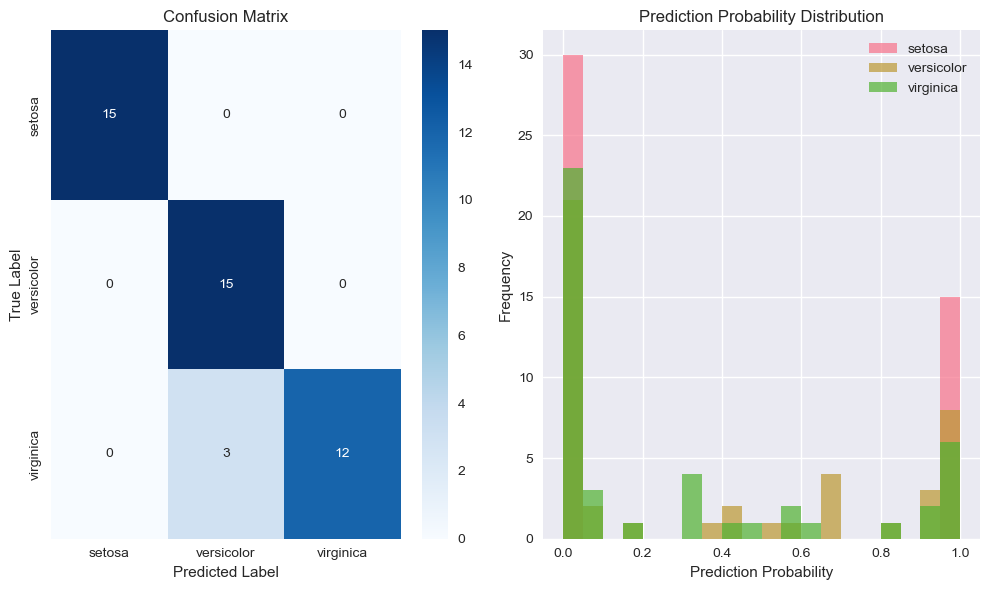

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test_iris, y_pred_clf)

plt.figure(figsize=(10, 6))

# Plot confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Plot prediction probabilities
plt.subplot(1, 2, 2)
for i, class_name in enumerate(iris.target_names):
    plt.hist(y_proba_clf[:, i], alpha=0.7, label=f'{class_name}', bins=20)
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.title('Prediction Probability Distribution')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
# Regression evaluation
y_pred_reg = best_knn_reg.predict(X_test_reg_scaled)

mse_test = mean_squared_error(y_test_reg, y_pred_reg)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_reg, y_pred_reg)
r2_test = r2_score(y_test_reg, y_pred_reg)

print("📈 Regression Evaluation:")
print(f"Test MSE  : {mse_test:.3f}")
print(f"Test RMSE : {rmse_test:.3f}")
print(f"Test MAE  : {mae_test:.3f}")
print(f"Test R²   : {r2_test:.3f}")

📈 Regression Evaluation:
Test MSE  : 1423.174
Test RMSE : 37.725
Test MAE  : 26.989
Test R²   : 0.885


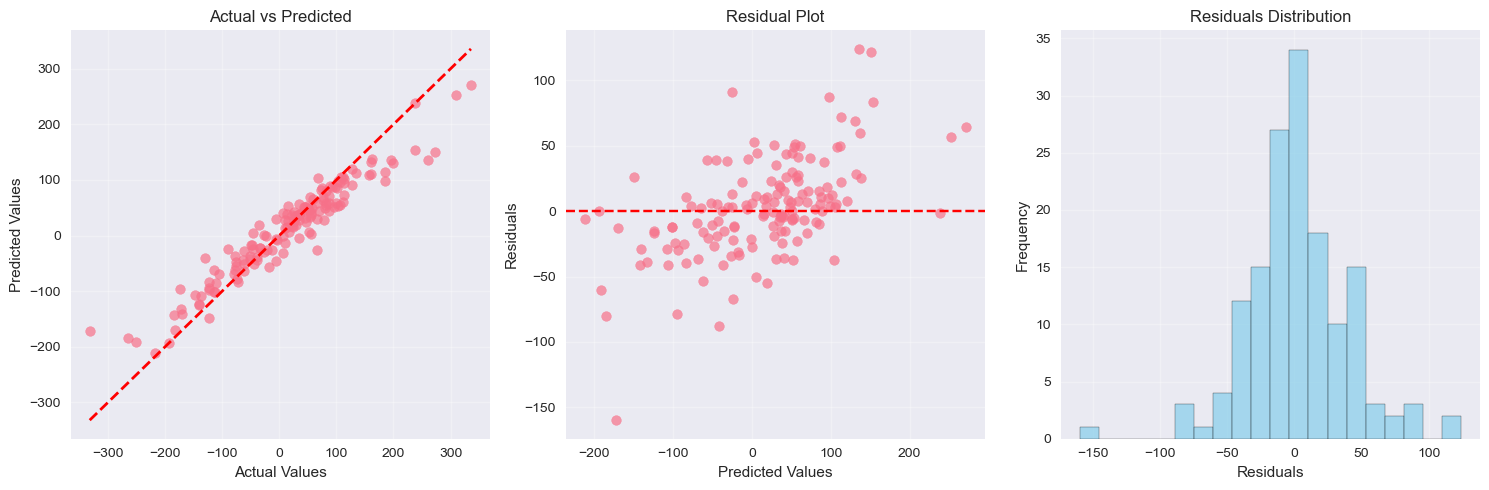

In [23]:
# Plot regression results
plt.figure(figsize=(15, 5))

# Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True, alpha=0.3)

# Residuals
residuals = y_test_reg - y_pred_reg
plt.subplot(1, 3, 2)
plt.scatter(y_pred_reg, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# Residuals distribution
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🎨 Creating Comprehensive KNN Visualizations


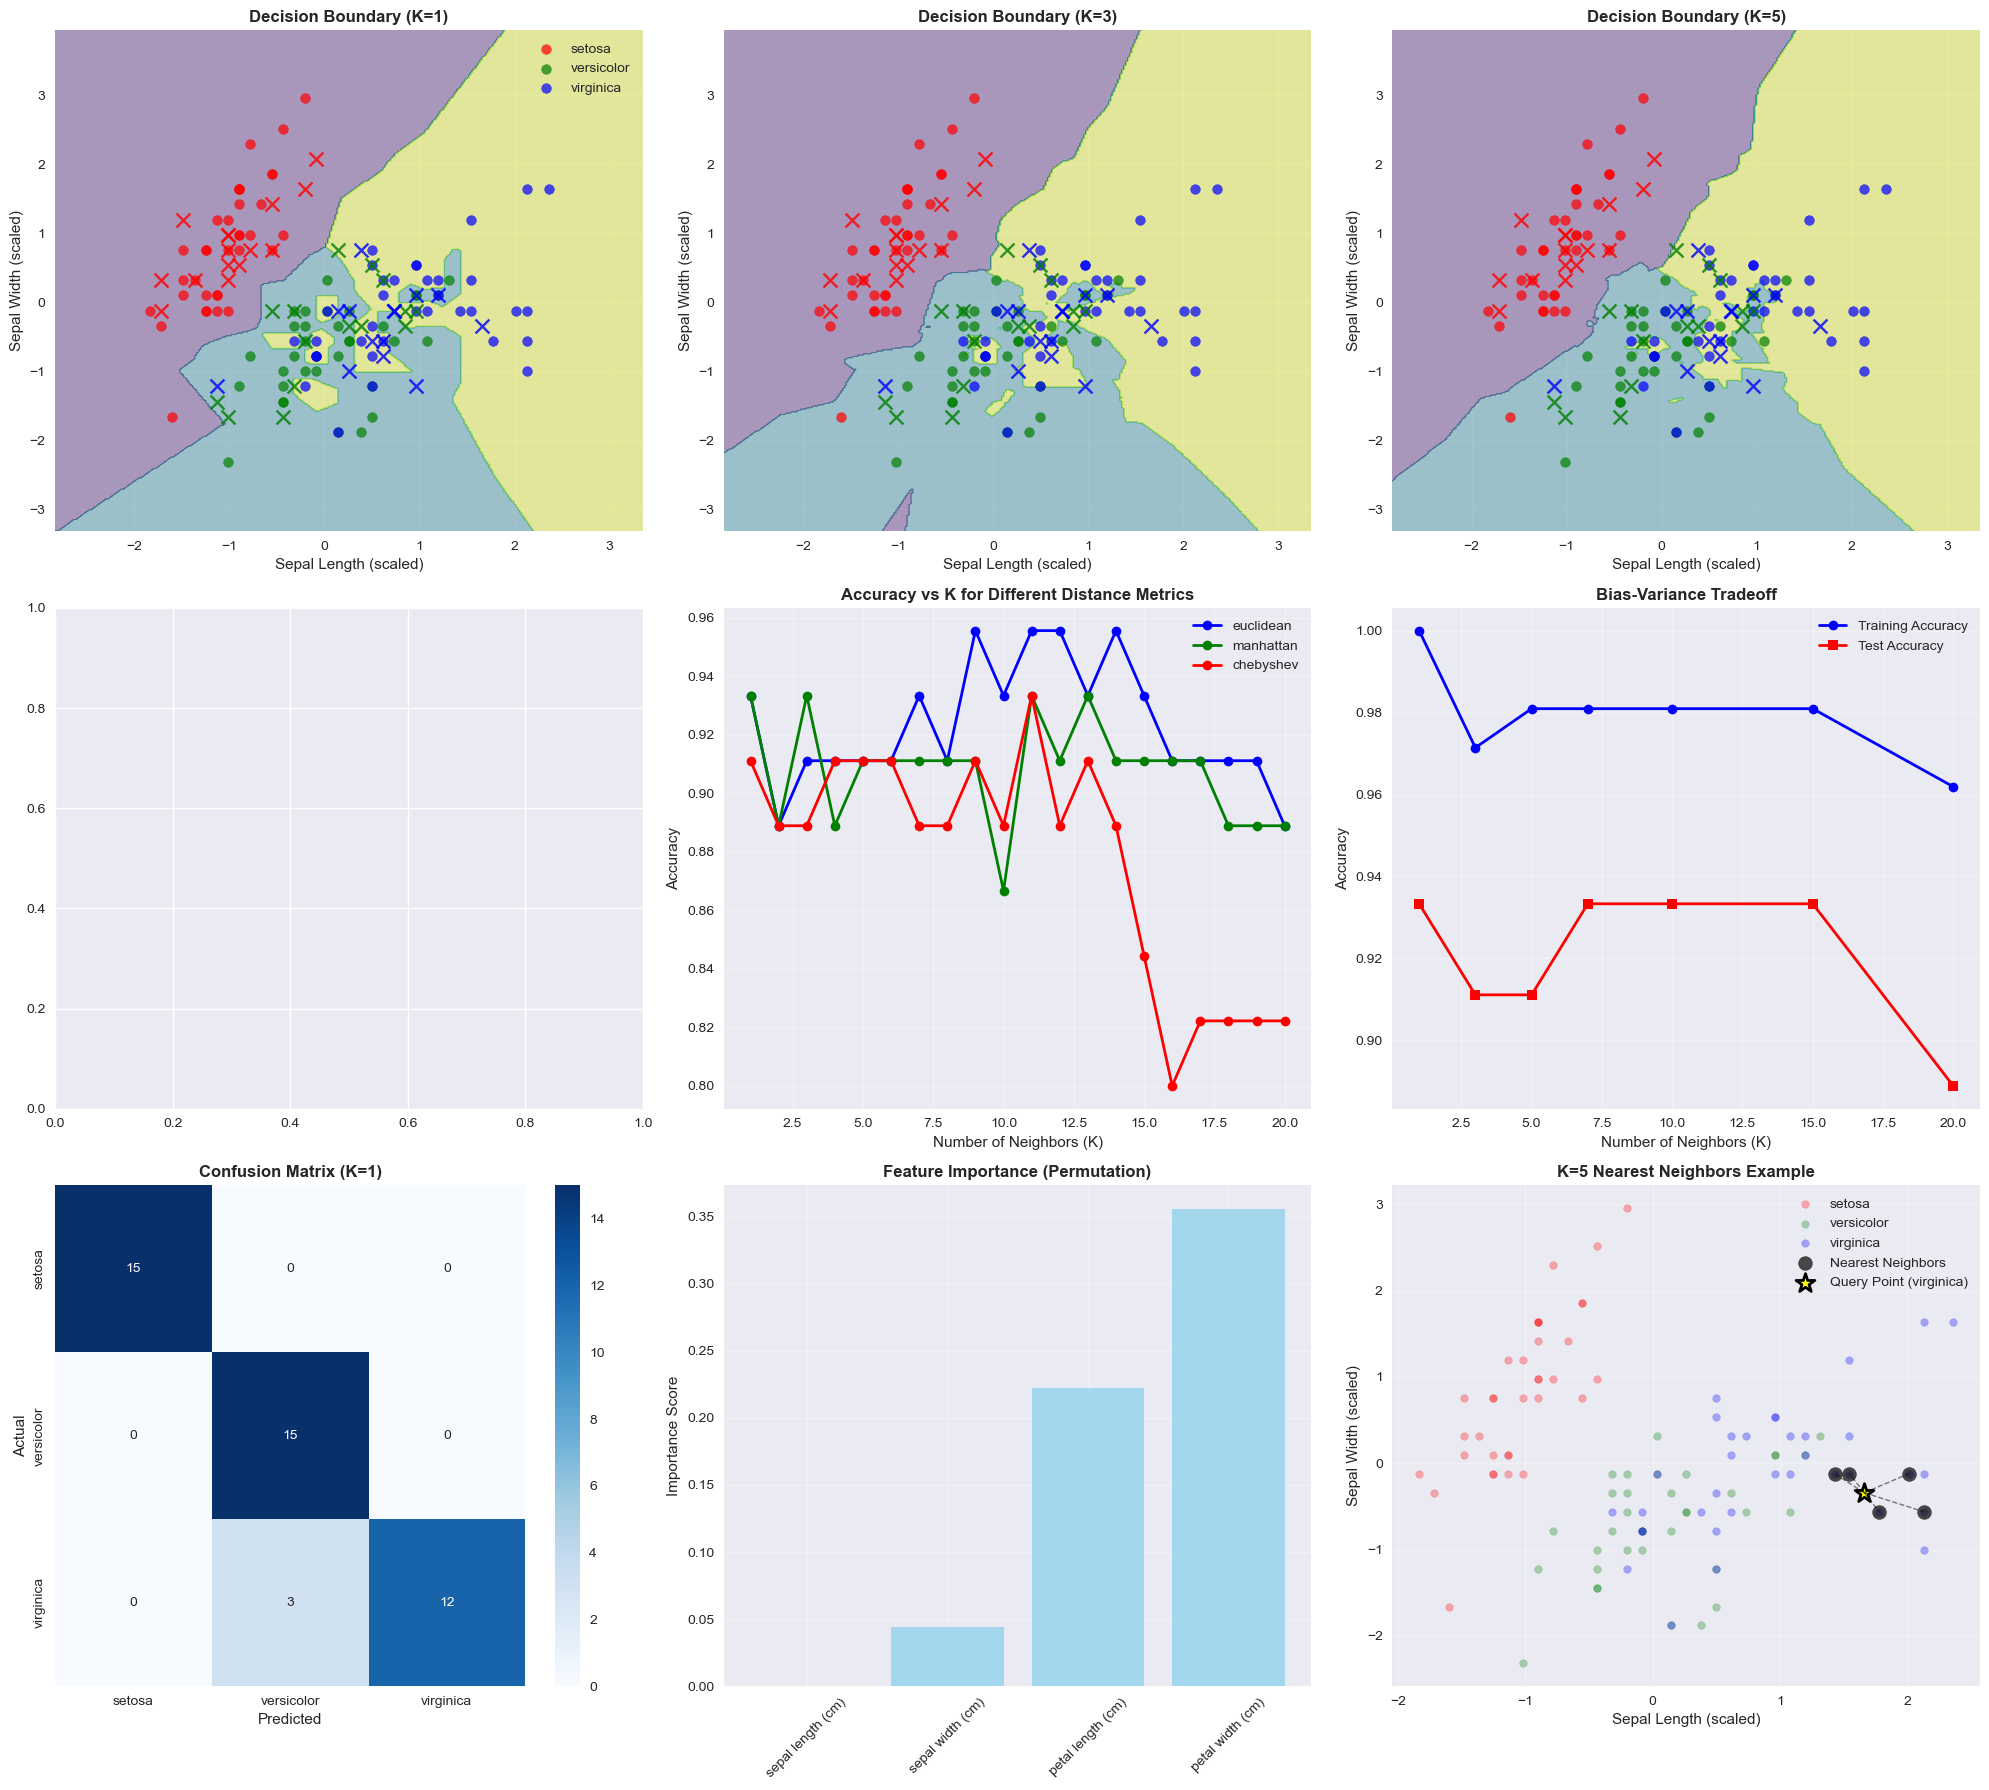


📊 Visualization Summary:
✅ Decision boundaries show how K affects model complexity
✅ Distance metrics comparison reveals performance differences
✅ Bias-variance tradeoff demonstrates optimal K selection
✅ Best K value found: 1
✅ Best test accuracy: 0.933


In [25]:
# Create comprehensive visualizations for KNN
print("🎨 Creating Comprehensive KNN Visualizations")

# Prepare data for 2D visualization (use first 2 features of Iris)
X_2d = X_iris[:, :2]  # Sepal length and width
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

# Scale the 2D data
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

# Create mesh for decision boundary
h = 0.02
x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

# 1. Decision boundaries for different K values
k_values_viz = [1, 3, 5]
for i, k in enumerate(k_values_viz):
    ax = axes[0, i]
    
    # Train KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_2d_scaled, y_train_2d)
    
    # Predict on mesh
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    
    # Plot training points
    colors = ['red', 'green', 'blue']
    for j, color in enumerate(colors):
        idx = y_train_2d == j
        ax.scatter(X_train_2d_scaled[idx, 0], X_train_2d_scaled[idx, 1], c=color, label=iris.target_names[j], alpha=0.7, s=50)
    
    # Plot test points with different markers
    for j, color in enumerate(colors):
        idx = y_test_2d == j
        ax.scatter(X_test_2d_scaled[idx, 0], X_test_2d_scaled[idx, 1], c=color, marker='x', s=100, alpha=0.8)
    
    ax.set_title(f'Decision Boundary (K={k})', fontweight='bold')
    ax.set_xlabel('Sepal Length (scaled)')
    ax.set_ylabel('Sepal Width (scaled)')
    if i == 0:
        ax.legend()
    ax.grid(True, alpha=0.3)

# 3. Distance metrics comparison
k_range = range(1, 21)
metrics = ['euclidean', 'manhattan', 'chebyshev']
metric_colors = ['blue', 'green', 'red']

for metric, color in zip(metrics, metric_colors):
    accuracies = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train_iris_scaled, y_train_iris)
        pred = knn.predict(X_test_iris_scaled)
        acc = accuracy_score(y_test_iris, pred)
        accuracies.append(acc)
    
    axes[1, 1].plot(k_range, accuracies, marker='o', label=metric, color=color, linewidth=2)

axes[1, 1].set_xlabel('Number of Neighbors (K)')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_title('Accuracy vs K for Different Distance Metrics', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 4. Bias-Variance tradeoff visualization
k_range_bias = [1, 3, 5, 7, 10, 15, 20]
train_accuracies = []
test_accuracies = []

for k in k_range_bias:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_iris_scaled, y_train_iris)
    
    train_pred = knn.predict(X_train_iris_scaled)
    test_pred = knn.predict(X_test_iris_scaled)
    
    train_acc = accuracy_score(y_train_iris, train_pred)
    test_acc = accuracy_score(y_test_iris, test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

axes[1, 2].plot(k_range_bias, train_accuracies, marker='o', label='Training Accuracy', color='blue', linewidth=2)
axes[1, 2].plot(k_range_bias, test_accuracies, marker='s', label='Test Accuracy', color='red', linewidth=2)
axes[1, 2].set_xlabel('Number of Neighbors (K)')
axes[1, 2].set_ylabel('Accuracy')
axes[1, 2].set_title('Bias-Variance Tradeoff', fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

# 5. Confusion matrix for best K
best_k = k_range_bias[np.argmax(test_accuracies)]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_iris_scaled, y_train_iris)
pred_best = knn_best.predict(X_test_iris_scaled)
cm = confusion_matrix(y_test_iris, pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names, ax=axes[2, 0])
axes[2, 0].set_title(f'Confusion Matrix (K={best_k})', fontweight='bold')
axes[2, 0].set_xlabel('Predicted')
axes[2, 0].set_ylabel('Actual')

# 6. Feature importance via permutation (approximate)
feature_importances = []
baseline_acc = accuracy_score(y_test_iris, pred_best)

for i in range(X_test_iris_scaled.shape[1]):
    X_test_permuted = X_test_iris_scaled.copy()
    np.random.shuffle(X_test_permuted[:, i])
    pred_permuted = knn_best.predict(X_test_permuted)
    acc_permuted = accuracy_score(y_test_iris, pred_permuted)
    importance = baseline_acc - acc_permuted
    feature_importances.append(importance)

axes[2, 1].bar(iris.feature_names, feature_importances, color='skyblue', alpha=0.7)
axes[2, 1].set_title('Feature Importance (Permutation)', fontweight='bold')
axes[2, 1].set_ylabel('Importance Score')
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 1].grid(True, alpha=0.3)

# 7. Nearest neighbors visualization for a sample point
sample_idx = 0
sample_point = X_test_2d_scaled[sample_idx:sample_idx+1]
sample_label = y_test_2d[sample_idx]

knn_sample = KNeighborsClassifier(n_neighbors=5)
knn_sample.fit(X_train_2d_scaled, y_train_2d)

# Find nearest neighbors
distances, indices = knn_sample.kneighbors(sample_point)
neighbors_points = X_train_2d_scaled[indices[0]]
neighbor_labels = y_train_2d[indices[0]]

# Plot
colors = ['red', 'green', 'blue']
for j, color in enumerate(colors):
    idx = y_train_2d == j
    axes[2, 2].scatter(X_train_2d_scaled[idx, 0], X_train_2d_scaled[idx, 1],     c=color, label=iris.target_names[j], alpha=0.3, s=30)

# Highlight nearest neighbors
axes[2, 2].scatter(neighbors_points[:, 0], neighbors_points[:, 1], c='black', s=100, marker='o', alpha=0.7, label='Nearest Neighbors')

# Highlight query point
axes[2, 2].scatter(sample_point[0, 0], sample_point[0, 1], c='yellow', s=200, marker='*', edgecolor='black', linewidth=2,label=f'Query Point ({iris.target_names[sample_label]})')

# Draw lines to nearest neighbors
for neighbor in neighbors_points:
    axes[2, 2].plot([sample_point[0, 0], neighbor[0]],  [sample_point[0, 1], neighbor[1]],  'k--', alpha=0.5, linewidth=1)

axes[2, 2].set_title('K=5 Nearest Neighbors Example', fontweight='bold')
axes[2, 2].set_xlabel('Sepal Length (scaled)')
axes[2, 2].set_ylabel('Sepal Width (scaled)')
axes[2, 2].legend()
axes[2, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Visualization Summary:")
print(f"✅ Decision boundaries show how K affects model complexity")
print(f"✅ Distance metrics comparison reveals performance differences")
print(f"✅ Bias-variance tradeoff demonstrates optimal K selection")
print(f"✅ Best K value found: {best_k}")
print(f"✅ Best test accuracy: {max(test_accuracies):.3f}")

## **🌍 12. Real-World Applications** <a id="applications"></a>

### 1. 🏠 Real Estate Price Prediction

In [27]:
# Simulate real estate data
np.random.seed(42)
n_houses = 1000

# Features: sqft, bedrooms, bathrooms, age, distance_to_city
sqft = np.random.normal(2000, 500, n_houses)
bedrooms = np.random.poisson(3, n_houses)
bathrooms = np.random.poisson(2, n_houses)
age = np.random.exponential(10, n_houses)
distance_to_city = np.random.gamma(2, 5, n_houses)

# Create price based on features (with some noise)
price = (
    100 * sqft + 
    20000 * bedrooms + 
    15000 * bathrooms - 
    1000 * age - 
    2000 * distance_to_city + 
    np.random.normal(0, 20000, n_houses)
)

X_houses = np.column_stack([sqft, bedrooms, bathrooms, age, distance_to_city])
y_houses = price

# Create DataFrame for better visualization
house_df = pd.DataFrame(X_houses, columns=['sqft', 'bedrooms', 'bathrooms', 'age', 'distance_to_city'])
house_df['price'] = y_houses

print("🏠 Real Estate Dataset:")
display(house_df.describe().round(2))

🏠 Real Estate Dataset:


,sqft,bedrooms,bathrooms,age,distance_to_city,price
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,2009.67,2.97,1.92,9.37,10.32,258748.40
std,489.61,1.68,1.30,9.14,7.12,68260.83
min,379.37,0.00,0.00,0.00,0.43,22540.49
25%,1676.20,2.00,1.00,2.92,4.90,214952.01
50%,2012.65,3.00,2.00,6.57,8.66,258149.58
75%,2323.97,4.00,3.00,12.65,14.17,301230.79
max,3926.37,9.00,8.00,58.06,46.29,486444.16


🏠 House Price Prediction Results:
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
RMSE     : $26,803.42
MAE      : $20,919.44
R² Score : 0.844


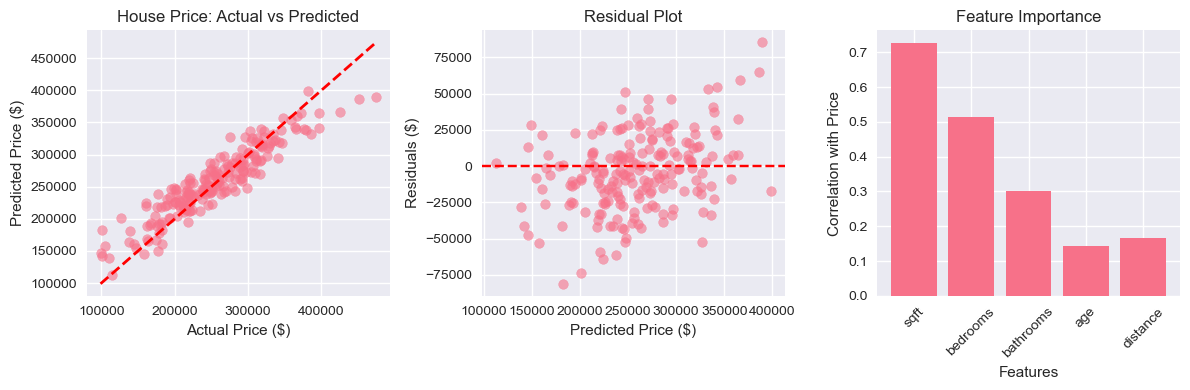

In [29]:
# Apply KNN for house price prediction
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(X_houses, y_houses, test_size=0.2, random_state=42)

# Scale features
scaler_house = StandardScaler()
X_train_house_scaled = scaler_house.fit_transform(X_train_house)
X_test_house_scaled = scaler_house.transform(X_test_house)

# Find optimal parameters
param_grid_house = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],
    'weights': ['uniform', 'distance']
}

knn_house = KNeighborsRegressor()
grid_house = GridSearchCV(
    knn_house, param_grid_house, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

grid_house.fit(X_train_house_scaled, y_train_house)
best_knn_house = grid_house.best_estimator_

# Predictions
y_pred_house = best_knn_house.predict(X_test_house_scaled)

# Evaluation
mse_house = mean_squared_error(y_test_house, y_pred_house)
rmse_house = np.sqrt(mse_house)
mae_house = mean_absolute_error(y_test_house, y_pred_house)
r2_house = r2_score(y_test_house, y_pred_house)

print(f"🏠 House Price Prediction Results:")
print(f"Best Parameters: {grid_house.best_params_}")
print(f"RMSE     : ${rmse_house:,.2f}")
print(f"MAE      : ${mae_house:,.2f}")
print(f"R² Score : {r2_house:.3f}")

# Visualize results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(y_test_house, y_pred_house, alpha=0.6)
plt.plot([y_test_house.min(), y_test_house.max()], [y_test_house.min(), y_test_house.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('House Price: Actual vs Predicted')

plt.subplot(1, 3, 2)
residuals_house = y_test_house - y_pred_house
plt.scatter(y_pred_house, residuals_house, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Residual Plot')

plt.subplot(1, 3, 3)
feature_importance = np.abs(np.corrcoef(X_houses.T, y_houses)[:-1, -1])
features = ['sqft', 'bedrooms', 'bathrooms', 'age', 'distance']
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Correlation with Price')
plt.title('Feature Importance')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 2. 🛡️ Fraud Detection

In [31]:
# Simulate credit card transaction data
np.random.seed(42)
n_transactions = 5000

# Normal transactions (95%)
n_normal = int(0.95 * n_transactions)
normal_amount = np.random.lognormal(3, 1, n_normal)                 # Log-normal distribution
normal_time = np.random.uniform(0, 24, n_normal)                    # Time of day
normal_merchant_type = np.random.choice([0, 1, 2, 3, 4], n_normal)  # Merchant categories
normal_location = np.random.normal(0, 1, n_normal)                  # Location score

# Fraudulent transactions (5%)
n_fraud = n_transactions - n_normal
fraud_amount = np.random.uniform(500, 5000, n_fraud)        # Higher amounts
fraud_time = np.random.choice([2, 3, 4, 22, 23], n_fraud)   # Unusual hours
fraud_merchant_type = np.random.choice([2, 3, 4], n_fraud)  # Riskier merchants
fraud_location = np.random.normal(3, 1, n_fraud)            # Unusual locations

# Combine data
amounts = np.concatenate([normal_amount, fraud_amount])
times = np.concatenate([normal_time, fraud_time])
merchants = np.concatenate([normal_merchant_type, fraud_merchant_type])
locations = np.concatenate([normal_location, fraud_location])
labels = np.concatenate([np.zeros(n_normal), np.ones(n_fraud)])

# Additional features
frequency = np.random.poisson(2, n_transactions)  # Daily transaction frequency
avg_amount = amounts + np.random.normal(0, 50, n_transactions)  # Average amount variation

X_fraud = np.column_stack([amounts, times, merchants, locations, frequency, avg_amount])
y_fraud = labels

print(f"💳 Fraud Detection Dataset:")
print(f"Total      transactions: {n_transactions}")
print(f"Normal     transactions: {n_normal} ({n_normal/n_transactions*100:.1f}%)")
print(f"Fraudulent transactions: {n_fraud} ({n_fraud/n_transactions*100:.1f}%)")

💳 Fraud Detection Dataset:
Total      transactions: 5000
Normal     transactions: 4750 (95.0%)
Fraudulent transactions: 250 (5.0%)


🛡️ Fraud Detection Results:
Accuracy    : 1.000
Precision   : 1.000
Recall      : 1.000
F1-Score    : 1.000
AUC-ROC     : 1.000


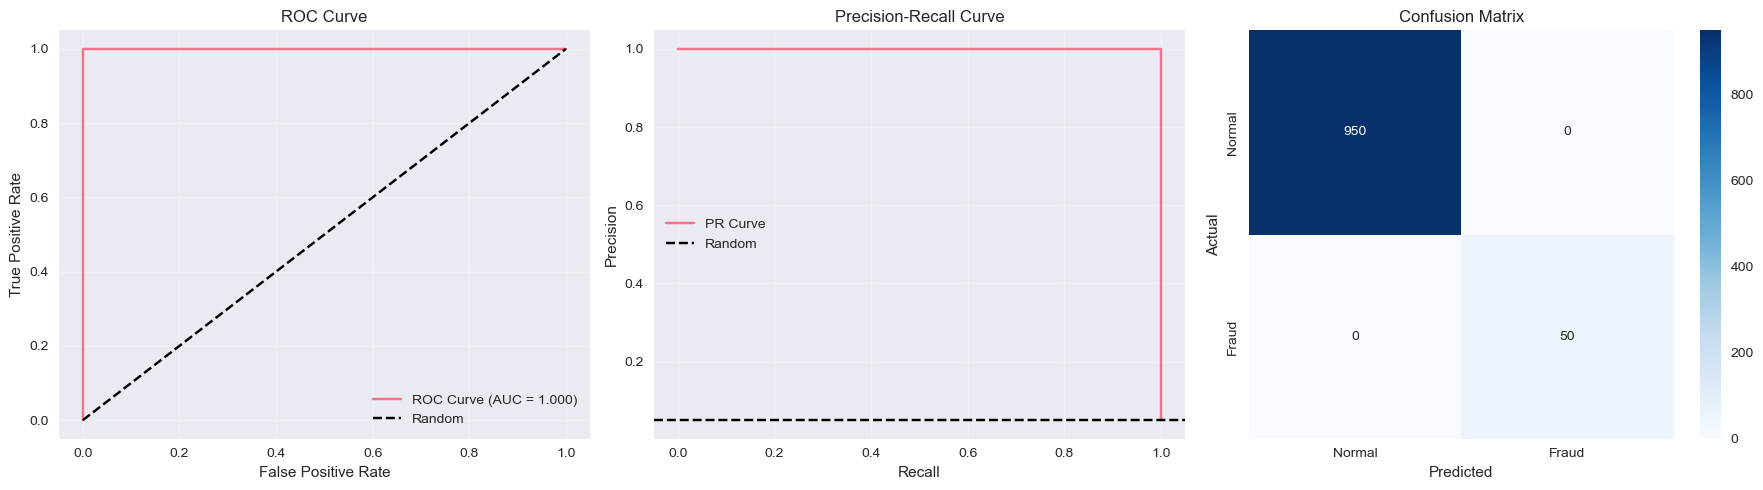

In [35]:
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(X_fraud, y_fraud, test_size=0.2, random_state=42, stratify=y_fraud)

# Scale features
scaler_fraud = StandardScaler()
X_train_fraud_scaled = scaler_fraud.fit_transform(X_train_fraud)
X_test_fraud_scaled = scaler_fraud.transform(X_test_fraud)

# Train KNN for fraud detection
knn_fraud = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn_fraud.fit(X_train_fraud_scaled, y_train_fraud)

# Predictions
y_pred_fraud = knn_fraud.predict(X_test_fraud_scaled)
y_proba_fraud = knn_fraud.predict_proba(X_test_fraud_scaled)[:, 1]

# Evaluation metrics
accuracy_fraud = accuracy_score(y_test_fraud, y_pred_fraud)
precision_fraud = precision_score(y_test_fraud, y_pred_fraud)
recall_fraud = recall_score(y_test_fraud, y_pred_fraud)
f1_fraud = f1_score(y_test_fraud, y_pred_fraud)
auc_fraud = roc_auc_score(y_test_fraud, y_proba_fraud)

print(f"🛡️ Fraud Detection Results:")
print(f"Accuracy    : {accuracy_fraud:.3f}")
print(f"Precision   : {precision_fraud:.3f}")
print(f"Recall      : {recall_fraud:.3f}")
print(f"F1-Score    : {f1_fraud:.3f}")
print(f"AUC-ROC     : {auc_fraud:.3f}")

# Plot evaluation curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_fraud, y_proba_fraud)
axes[0].plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_fraud:.3f})')
axes[0].plot([0, 1], [0, 1], 'k--', label='Random')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test_fraud, y_proba_fraud)
axes[1].plot(recall_curve, precision_curve, label=f'PR Curve')
axes[1].axhline(y=np.mean(y_test_fraud), color='k', linestyle='--', label='Random')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Confusion Matrix
cm_fraud = confusion_matrix(y_test_fraud, y_pred_fraud)
sns.heatmap(cm_fraud, annot=True, fmt='d', cmap='Blues', ax=axes[2],
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_title('Confusion Matrix')

plt.tight_layout()
plt.show()

### 3. 🏥 Medical Diagnosis - Breast Cancer Classification

KNN is widely used in medical diagnosis where finding similar patients (neighbors) can provide valuable insights for treatment decisions.

🏥 Medical Diagnosis Example: Breast Cancer Classification
Dataset             : 569 patients, 30 features
Classes             : ['malignant' 'benign']
Class distribution  : [212 357]

First 5 patients:


,mean radius,mean texture,mean perimeter,mean area,diagnosis_name
0,17.99,10.38,122.80,1001.0,malignant
1,20.57,17.77,132.90,1326.0,malignant
2,19.69,21.25,130.00,1203.0,malignant
3,11.42,20.38,77.58,386.1,malignant
4,20.29,14.34,135.10,1297.0,malignant



🔍 Comprehensive KNN Analysis for Medical Diagnosis
Optimal K for medical diagnosis: 8

📊 Medical Diagnosis Performance:
Accuracy  : 0.974
Precision : 0.973
Recall    : 0.986
F1-Score  : 0.979
AUC-ROC   : 0.991

📋 Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        42
      benign       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Optimal K for medical diagnosis: 8

📊 Medical Diagnosis Performance:
Accuracy  : 0.974
Precision : 0.973
Recall    : 0.986
F1-Score  : 0.979
AUC-ROC   : 0.991

📋 Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        42
      benign       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg   

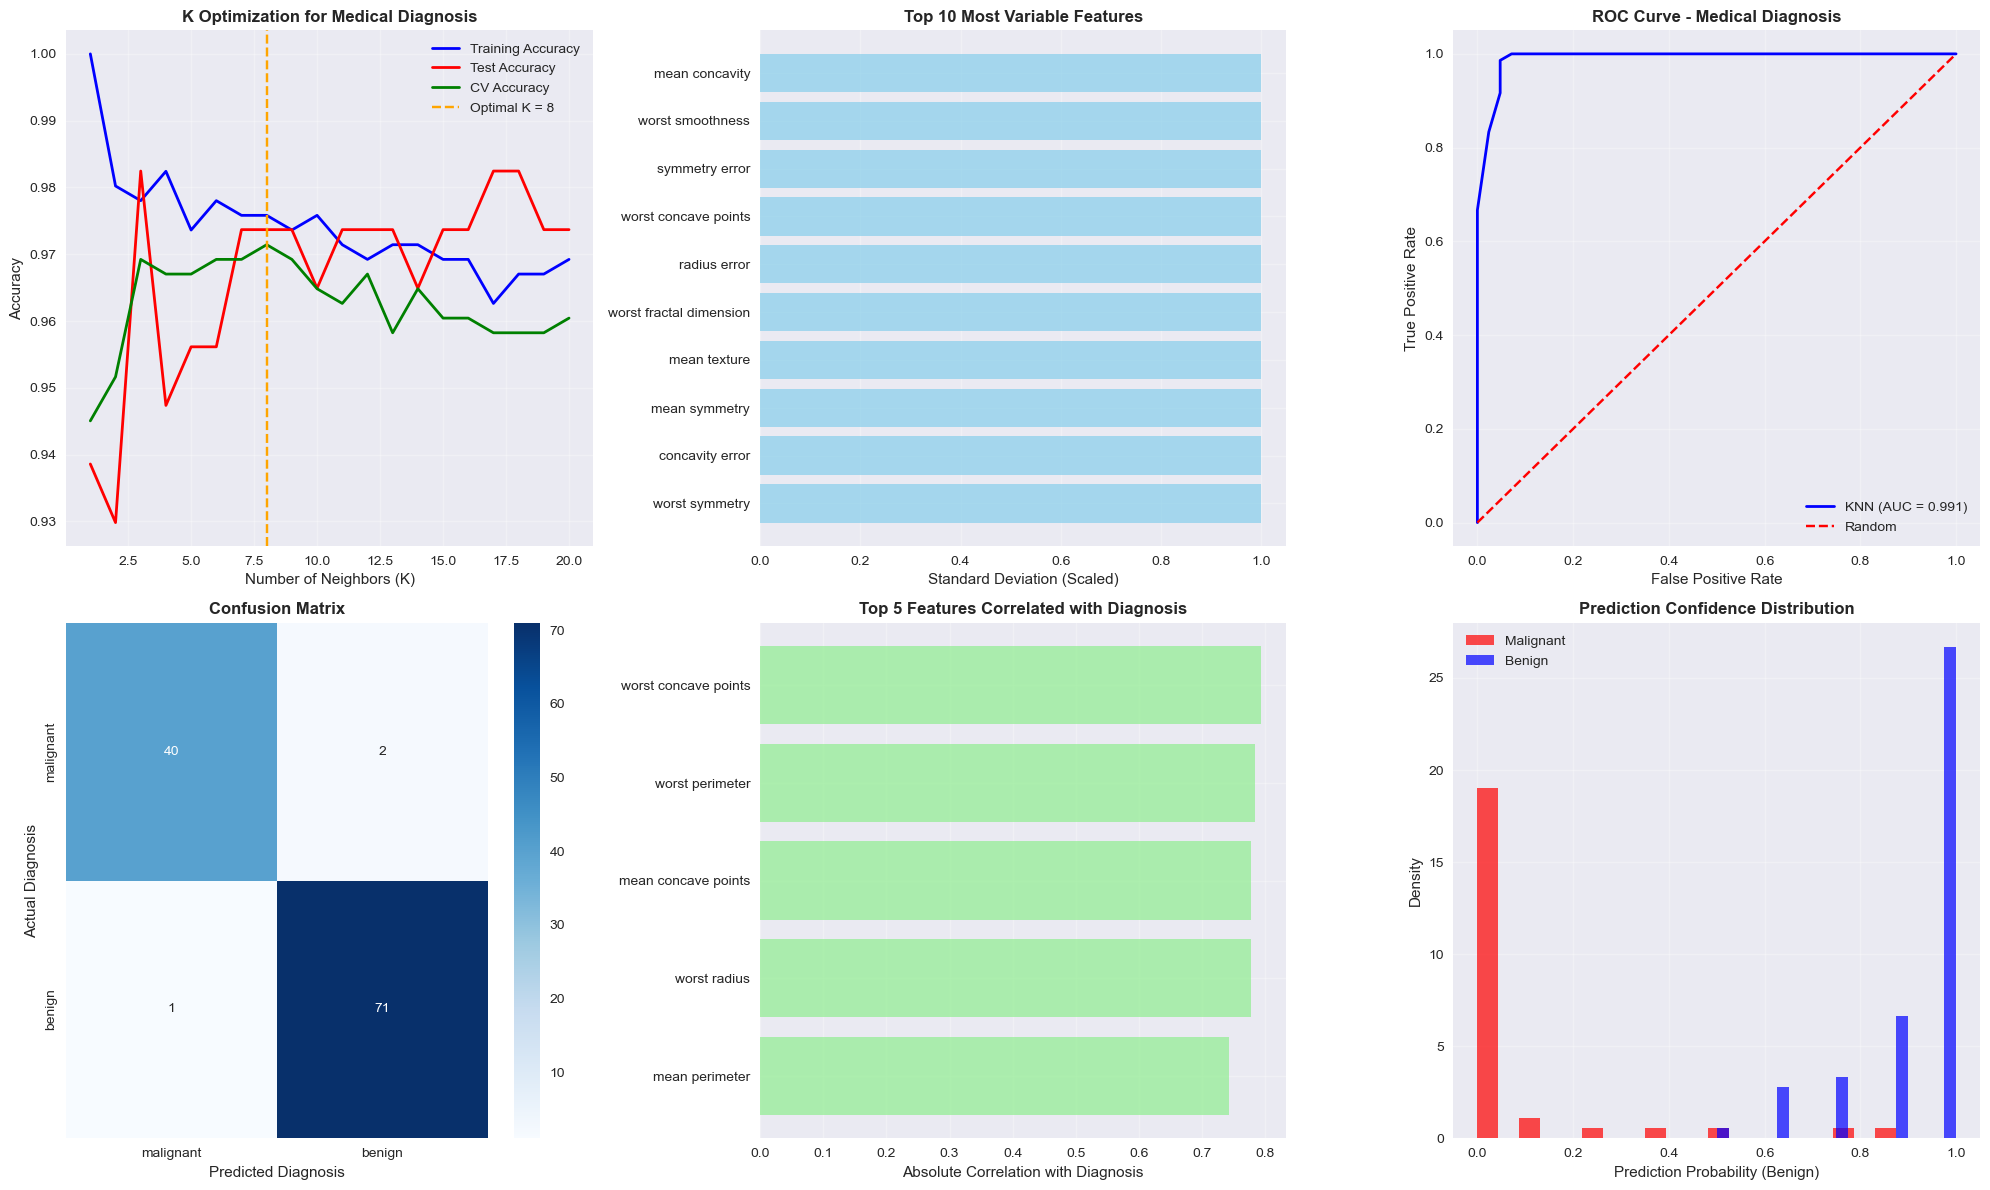


🩺 Clinical Interpretation:
• High accuracy (97.4%) suggests KNN is effective for breast cancer diagnosis
• High precision (97.3%) means low false positive rate
• High recall (98.6%) means most malignant cases are detected
• AUC of 0.991 indicates excellent diagnostic ability
• Optimal K=8 suggests considering 8 most similar patients for diagnosis

👥 Example: Finding Similar Patients
Sample Patient Diagnosis: malignant
KNN Prediction: malignant
Prediction Confidence: 0.000

8 Most Similar Patients:
  Patient 1: malignant (distance: 3.101)
  Patient 2: malignant (distance: 3.630)
  Patient 3: malignant (distance: 3.724)
  Patient 4: malignant (distance: 3.814)
  Patient 5: malignant (distance: 3.897)
  Patient 6: malignant (distance: 3.914)
  Patient 7: malignant (distance: 3.987)
  Patient 8: malignant (distance: 3.997)
Majority vote from neighbors: malignant


In [36]:
# Load breast cancer dataset
print("🏥 Medical Diagnosis Example: Breast Cancer Classification")

# Load and explore the dataset
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target

print(f"Dataset             : {len(X_cancer)} patients, {X_cancer.shape[1]} features")
print(f"Classes             : {cancer.target_names}")
print(f"Class distribution  : {np.bincount(y_cancer)}")

# Create DataFrame for better visualization
cancer_df = pd.DataFrame(X_cancer, columns=cancer.feature_names)
cancer_df['diagnosis'] = y_cancer
cancer_df['diagnosis_name'] = cancer_df['diagnosis'].map({0: 'malignant', 1: 'benign'})

print("\nFirst 5 patients:")
display(cancer_df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'diagnosis_name']].head())

# Split the data
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer)

# Scale features (CRITICAL for medical data)
scaler_cancer = StandardScaler()
X_train_cancer_scaled = scaler_cancer.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler_cancer.transform(X_test_cancer)

# Comprehensive KNN analysis for medical diagnosis
print("\n🔍 Comprehensive KNN Analysis for Medical Diagnosis")

# K optimization with detailed analysis
k_range = range(1, 21)
train_accuracies_cancer = []
test_accuracies_cancer  = []
cv_accuracies_cancer    = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Cross-validation
    cv_scores = cross_val_score(knn, X_train_cancer_scaled, y_train_cancer, cv=5, scoring='accuracy')
    cv_accuracies_cancer.append(cv_scores.mean())
    
    # Train and test
    knn.fit(X_train_cancer_scaled, y_train_cancer)
    train_acc = knn.score(X_train_cancer_scaled, y_train_cancer)
    test_acc = knn.score(X_test_cancer_scaled, y_test_cancer)
    
    train_accuracies_cancer.append(train_acc)
    test_accuracies_cancer.append(test_acc)

# Find optimal K
optimal_k_cancer = k_range[np.argmax(cv_accuracies_cancer)]
print(f"Optimal K for medical diagnosis: {optimal_k_cancer}")

# Train final model
knn_cancer = KNeighborsClassifier(n_neighbors=optimal_k_cancer)
knn_cancer.fit(X_train_cancer_scaled, y_train_cancer)

# Make predictions
y_pred_cancer = knn_cancer.predict(X_test_cancer_scaled)
y_proba_cancer = knn_cancer.predict_proba(X_test_cancer_scaled)[:, 1]

# Comprehensive evaluation
print("\n📊 Medical Diagnosis Performance:")
print(f"Accuracy  : {accuracy_score(y_test_cancer, y_pred_cancer):.3f}")
print(f"Precision : {precision_score(y_test_cancer, y_pred_cancer):.3f}")
print(f"Recall    : {recall_score(y_test_cancer, y_pred_cancer):.3f}")
print(f"F1-Score  : {f1_score(y_test_cancer, y_pred_cancer):.3f}")

# ROC-AUC
fpr_cancer, tpr_cancer, _ = roc_curve(y_test_cancer, y_proba_cancer)
auc_cancer = auc(fpr_cancer, tpr_cancer)
print(f"AUC-ROC   : {auc_cancer:.3f}")

# Detailed classification report
print("\n📋 Detailed Classification Report:")
print(classification_report(y_test_cancer, y_pred_cancer, target_names=cancer.target_names))

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. K optimization curves
axes[0, 0].plot(k_range, train_accuracies_cancer, 'b-', label='Training Accuracy', linewidth=2)
axes[0, 0].plot(k_range, test_accuracies_cancer, 'r-', label='Test Accuracy', linewidth=2)
axes[0, 0].plot(k_range, cv_accuracies_cancer, 'g-', label='CV Accuracy', linewidth=2)
axes[0, 0].axvline(x=optimal_k_cancer, color='orange', linestyle='--', label=f'Optimal K = {optimal_k_cancer}')
axes[0, 0].set_xlabel('Number of Neighbors (K)')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('K Optimization for Medical Diagnosis', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Feature importance (top 10 most variable features)
feature_std = np.std(X_train_cancer_scaled, axis=0)
top_features_idx = np.argsort(feature_std)[-10:]
top_features_names = [cancer.feature_names[i] for i in top_features_idx]
top_features_std = feature_std[top_features_idx]

axes[0, 1].barh(top_features_names, top_features_std, color='skyblue', alpha=0.7)
axes[0, 1].set_xlabel('Standard Deviation (Scaled)')
axes[0, 1].set_title('Top 10 Most Variable Features', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. ROC Curve
axes[0, 2].plot(fpr_cancer, tpr_cancer, color='blue', linewidth=2, label=f'KNN (AUC = {auc_cancer:.3f})')
axes[0, 2].plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
axes[0, 2].set_xlabel('False Positive Rate')
axes[0, 2].set_ylabel('True Positive Rate')
axes[0, 2].set_title('ROC Curve - Medical Diagnosis', fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Confusion Matrix
cm_cancer = confusion_matrix(y_test_cancer, y_pred_cancer)
sns.heatmap(cm_cancer, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],xticklabels=cancer.target_names, yticklabels=cancer.target_names)
axes[1, 0].set_xlabel('Predicted Diagnosis')
axes[1, 0].set_ylabel('Actual Diagnosis')
axes[1, 0].set_title('Confusion Matrix', fontweight='bold')

# 5. Feature correlation with diagnosis (top 5)
correlation_with_target = []
for i in range(X_cancer.shape[1]):
    corr = np.corrcoef(X_cancer[:, i], y_cancer)[0, 1]
    correlation_with_target.append(abs(corr))

top_corr_idx = np.argsort(correlation_with_target)[-5:]
top_corr_features = [cancer.feature_names[i] for i in top_corr_idx]
top_corr_values = [correlation_with_target[i] for i in top_corr_idx]

axes[1, 1].barh(top_corr_features, top_corr_values, color='lightgreen', alpha=0.7)
axes[1, 1].set_xlabel('Absolute Correlation with Diagnosis')
axes[1, 1].set_title('Top 5 Features Correlated with Diagnosis', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# 6. Prediction confidence distribution
axes[1, 2].hist(y_proba_cancer[y_test_cancer == 0], bins=20, alpha=0.7, label='Malignant', color='red', density=True)
axes[1, 2].hist(y_proba_cancer[y_test_cancer == 1], bins=20, alpha=0.7, label='Benign', color='blue', density=True)
axes[1, 2].set_xlabel('Prediction Probability (Benign)')
axes[1, 2].set_ylabel('Density')
axes[1, 2].set_title('Prediction Confidence Distribution', fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Clinical interpretation
print("\n🩺 Clinical Interpretation:")
print(f"• High accuracy ({accuracy_score(y_test_cancer, y_pred_cancer):.1%}) suggests KNN is effective for breast cancer diagnosis")
print(f"• High precision ({precision_score(y_test_cancer, y_pred_cancer):.1%}) means low false positive rate")
print(f"• High recall ({recall_score(y_test_cancer, y_pred_cancer):.1%}) means most malignant cases are detected")
print(f"• AUC of {auc_cancer:.3f} indicates excellent diagnostic ability")
print(f"• Optimal K={optimal_k_cancer} suggests considering {optimal_k_cancer} most similar patients for diagnosis")

# Example of finding similar patients
print(f"\n👥 Example: Finding Similar Patients")
sample_patient_idx = 0
sample_patient = X_test_cancer_scaled[sample_patient_idx:sample_patient_idx+1]
actual_diagnosis = cancer.target_names[y_test_cancer[sample_patient_idx]]

# Find neighbors
distances, indices = knn_cancer.kneighbors(sample_patient)
neighbor_diagnoses = y_train_cancer[indices[0]]
neighbor_distances = distances[0]

print(f"Sample Patient Diagnosis: {actual_diagnosis}")
print(f"KNN Prediction: {cancer.target_names[y_pred_cancer[sample_patient_idx]]}")
print(f"Prediction Confidence: {y_proba_cancer[sample_patient_idx]:.3f}")
print(f"\n{optimal_k_cancer} Most Similar Patients:")
for i, (dist, diag) in enumerate(zip(neighbor_distances, neighbor_diagnoses)):
    print(f"  Patient {i+1}: {cancer.target_names[diag]} (distance: {dist:.3f})")

majority_vote = cancer.target_names[np.bincount(neighbor_diagnoses).argmax()]
print(f"Majority vote from neighbors: {majority_vote}")

## **⚖️ 13. Advantages & Limitations** <a id="pros-cons"></a>

### ✅ Advantages

1. **Simple and Intuitive**: Easy to understand and implement
2. **No Training Period**: Lazy learning - no model training required
3. **Non-parametric**: Makes no assumptions about data distribution
4. **Versatile**: Works for both classification and regression
5. **Local Decision Making**: Adapts to local patterns in data
6. **Naturally Handles Multi-class**: No modification needed

### ❌ Limitations

1. **Computational Complexity**: O(n) for each prediction
2. **Curse of Dimensionality**: Performance degrades in high dimensions
3. **Sensitive to Irrelevant Features**: All features treated equally
4. **Memory Intensive**: Stores entire training dataset
5. **Sensitive to Scale**: Requires feature scaling
6. **Poor with Imbalanced Data**: Majority class dominates

### 🎯 When to Use KNN

✅ **Use When:**
- Small to medium-sized datasets
- Non-linear decision boundaries
- Local patterns are important
- Simple baseline model needed
- No assumptions about data distribution

❌ **Avoid When:**
- Large datasets (> 10,000 samples)
- High-dimensional data (> 50 features)
- Real-time predictions required
- Memory is limited
- Data is very noisy

## **🎯 14. Best Practices & Summary** <a id="best-practices"></a>

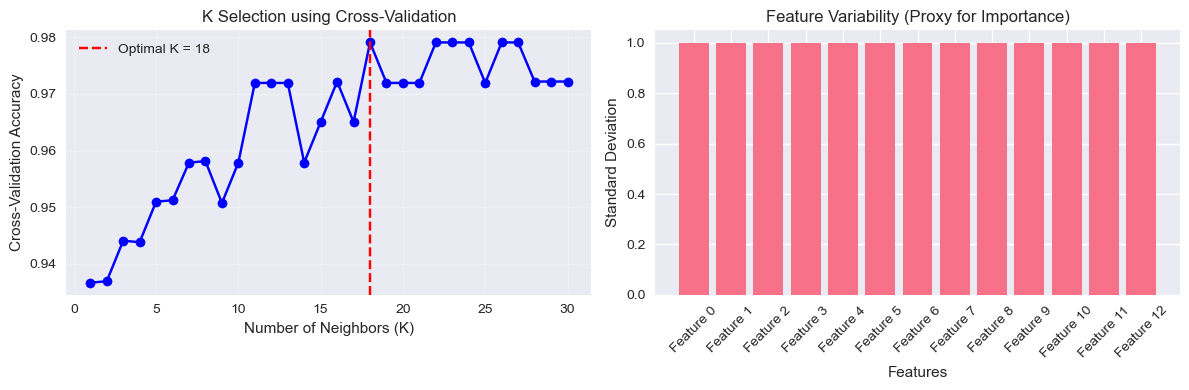

🏆 Best Practices Results:
Optimal K: 18
Train Accuracy: 0.965
Test Accuracy: 0.972
Overfitting Check: -0.007


In [ ]:
# Best Practices Implementation

def knn_best_practices_pipeline(X, y, test_size=0.2, random_state=42):
    """
    Complete KNN pipeline with best practices
    """
    
    # 1. Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    
    # 2. Scale features (CRITICAL for KNN)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 3. Find optimal K using cross-validation
    k_range = range(1, min(31, len(X_train) // 2))
    cv_scores = []
    
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())
    
    # Find optimal k
    optimal_k = k_range[np.argmax(cv_scores)]
    
    # 4. Train final model
    best_knn = KNeighborsClassifier(n_neighbors=optimal_k)
    best_knn.fit(X_train_scaled, y_train)
    
    # 5. Evaluate
    train_score = best_knn.score(X_train_scaled, y_train)
    test_score = best_knn.score(X_test_scaled, y_test)
    
    # 6. Plot results
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(k_range, cv_scores, 'bo-')
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title('K Selection using Cross-Validation')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Feature importance (based on distance to decision boundary)
    plt.subplot(1, 2, 2)
    feature_names = [f'Feature {i}' for i in range(X.shape[1])]
    feature_std = np.std(X_train_scaled, axis=0)
    plt.bar(feature_names, feature_std)
    plt.xlabel('Features')
    plt.ylabel('Standard Deviation')
    plt.title('Feature Variability (Proxy for Importance)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'model': best_knn,
        'scaler': scaler,
        'optimal_k': optimal_k,
        'train_score': train_score,
        'test_score': test_score,
        'cv_scores': cv_scores
    }

# Apply best practices to wine dataset
wine = load_wine()
results = knn_best_practices_pipeline(wine.data, wine.target)

print(f"🏆 Best Practices Results:")
print(f"Optimal K: {results['optimal_k']}")
print(f"Train Accuracy: {results['train_score']:.3f}")
print(f"Test Accuracy: {results['test_score']:.3f}")
print(f"Overfitting Check: {results['train_score'] - results['test_score']:.3f}")

## **📝 Complete KNN Summary & Key Takeaways**

### 🎯 Algorithm Overview
K-Nearest Neighbors (KNN) is a **non-parametric, lazy learning algorithm** that makes predictions based on the k closest training examples in the feature space. It's one of the simplest yet most effective machine learning algorithms for both classification and regression tasks.

### 🔑 Key Mathematical Concepts

**Distance Calculation:**
- **Euclidean**: $d = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$
- **Manhattan**: $d = \sum_{i=1}^{n} |x_i - y_i|$
- **Minkowski**: $d = \left(\sum_{i=1}^{n} |x_i - y_i|^p\right)^{1/p}$

**Prediction Methods:**
- **Classification**: $\hat{y} = \text{mode}\{y_1, y_2, ..., y_k\}$
- **Regression**: $\hat{y} = \frac{1}{k} \sum_{i=1}^{k} y_i$
- **Weighted**: $\hat{y} = \frac{\sum_{i=1}^{k} w_i \cdot y_i}{\sum_{i=1}^{k} w_i}$

### 🎛️ Critical Hyperparameters

| Parameter | Description | Typical Values | Impact |
|-----------|-------------|----------------|---------|
| **k** | Number of neighbors | 3, 5, 7, 9, 11 | Higher k = smoother decision boundary |
| **distance metric** | Distance calculation method | euclidean, manhattan | Affects neighbor selection |
| **weights** | Weighting scheme | uniform, distance | Distance weighting often better |
| **algorithm** | Search algorithm | auto, ball_tree, kd_tree | Affects computational efficiency |

### ✅ When to Choose KNN

**🟢 Ideal Scenarios:**
- **Dataset Size**: Small to medium (< 10,000 samples)
- **Dimensionality**: Low to moderate (< 20 features)
- **Decision Boundaries**: Non-linear, complex patterns
- **Data Distribution**: No assumptions needed
- **Baseline Model**: Quick prototyping and benchmarking
- **Local Patterns**: When local similarity matters

**🔴 Avoid When:**
- **Large Datasets**: Memory and computational constraints
- **High Dimensions**: Curse of dimensionality (features > 50)
- **Real-time**: Fast prediction response required
- **Noisy Data**: Many irrelevant features present
- **Linear Relationships**: Simple linear models would suffice

### 🛠️ Implementation Best Practices

#### 1. **Data Preprocessing (MANDATORY)**
```python
# Always scale features!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

#### 2. **Optimal K Selection**
```python
# Use cross-validation
k_range = range(1, 21)
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    cv_scores.append(scores.mean())
optimal_k = k_range[np.argmax(cv_scores)]
```

#### 3. **Distance Metric Selection**
- **Continuous features**: Euclidean distance
- **Mixed features**: Manhattan distance
- **High dimensions**: Consider Minkowski with p=1

#### 4. **Performance Optimization**
- Use `algorithm='auto'` for automatic optimization
- Consider `weights='distance'` for better performance
- Apply dimensionality reduction (PCA) for high-dimensional data

### 📊 Performance Characteristics

| Aspect | Rating | Notes |
|--------|--------|-------|
| **Accuracy** | ⭐⭐⭐⭐ | Excellent for appropriate datasets |
| **Training Speed** | ⭐⭐⭐⭐⭐ | Instant (lazy learning) |
| **Prediction Speed** | ⭐⭐ | O(n) per prediction |
| **Memory Usage** | ⭐⭐ | Stores entire training set |
| **Interpretability** | ⭐⭐⭐ | Can examine nearest neighbors |
| **Parameter Tuning** | ⭐⭐⭐⭐ | Few parameters to optimize |
| **Overfitting Resistance** | ⭐⭐⭐ | Depends on k value |

### 🌍 Real-World Applications

1. **🏠 Recommendation Systems**: Content-based filtering
2. **🏥 Medical Diagnosis**: Patient similarity analysis
3. **💰 Financial**: Credit scoring and fraud detection
4. **📱 Technology**: Image recognition and classification
5. **🛒 E-commerce**: Product recommendations
6. **🔍 Search Engines**: Document similarity matching

### ⚡ Common Pitfalls & Solutions

| Problem | Solution |
|---------|----------|
| **Poor performance** | Scale features properly |
| **Slow predictions** | Use efficient algorithms (ball_tree, kd_tree) |
| **Curse of dimensionality** | Apply PCA or feature selection |
| **Imbalanced classes** | Use stratified sampling or weighted voting |
| **Overfitting** | Increase k value |
| **Underfitting** | Decrease k value |

### 🚀 Advanced Techniques

1. **Approximate KNN**: LSH (Locality Sensitive Hashing) for large datasets
2. **Feature Engineering**: Distance-based features for ensemble methods
3. **Ensemble Methods**: Use KNN in voting classifiers
4. **Optimization**: KD-trees and Ball trees for efficiency
5. **Deep Learning**: Neural networks for learned distance metrics

### 📈 Next Steps for Mastery

1. **Explore Variants**: Weighted KNN, Adaptive KNN
2. **Optimization**: Learn about spatial data structures
3. **Applications**: Build recommendation systems
4. **Integration**: Combine with ensemble methods
5. **Research**: Study metric learning techniques

### 🎓 Final Recommendations

**For Beginners:**
- Start with k=5 and Euclidean distance
- Always scale your features
- Use cross-validation for k selection

**For Practitioners:**
- Experiment with different distance metrics
- Consider computational efficiency for large datasets
- Use KNN as a baseline for more complex models

**For Advanced Users:**
- Implement custom distance metrics
- Explore approximate algorithms for scalability
- Integrate with deep learning for representation learning

---

**🎯 Remember**: KNN's simplicity is both its strength and limitation. It's an excellent algorithm for understanding machine learning concepts and often provides surprisingly good performance with proper preprocessing and parameter tuning!